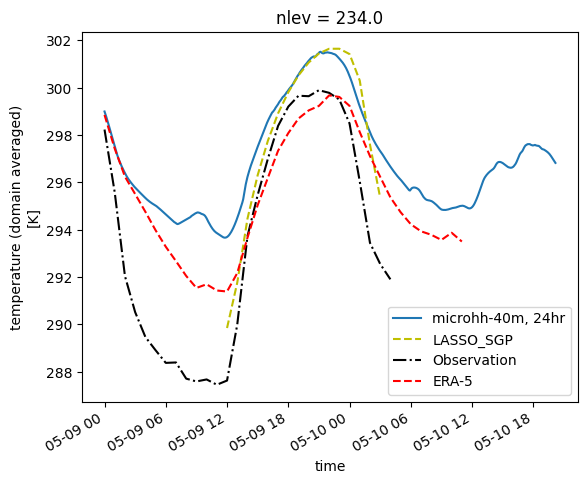

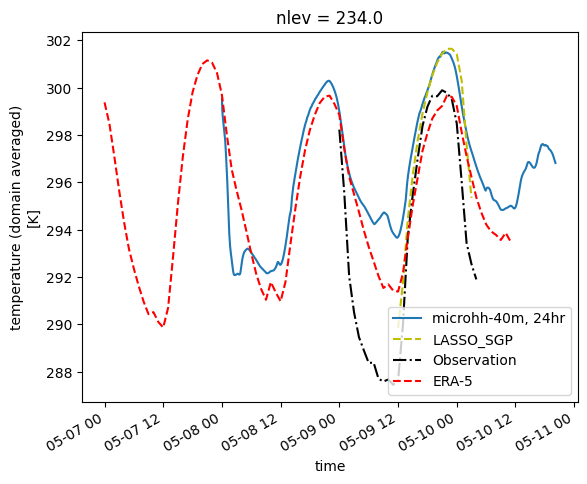

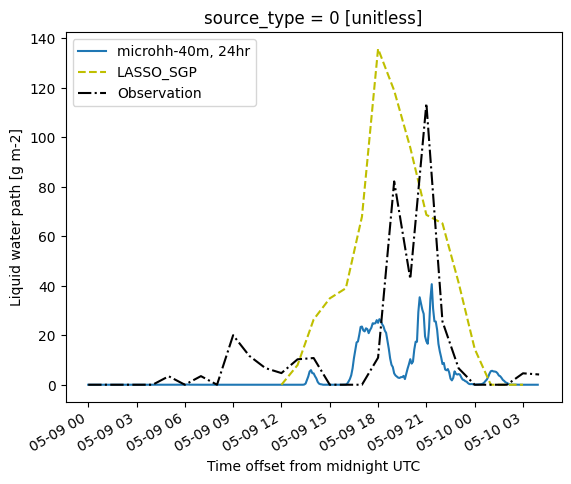

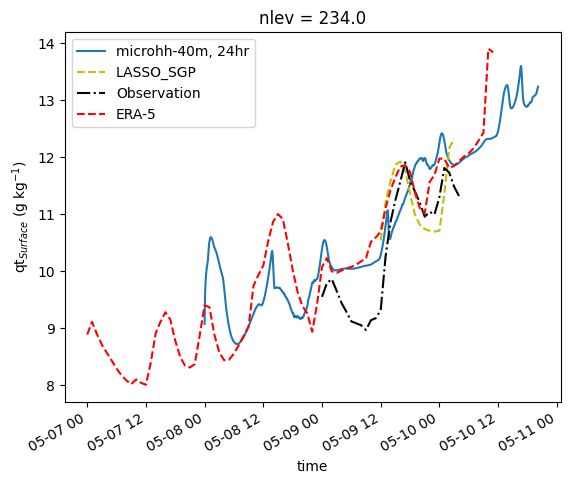

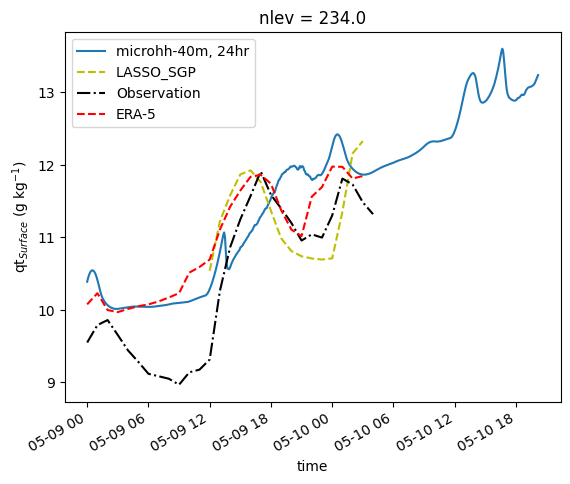

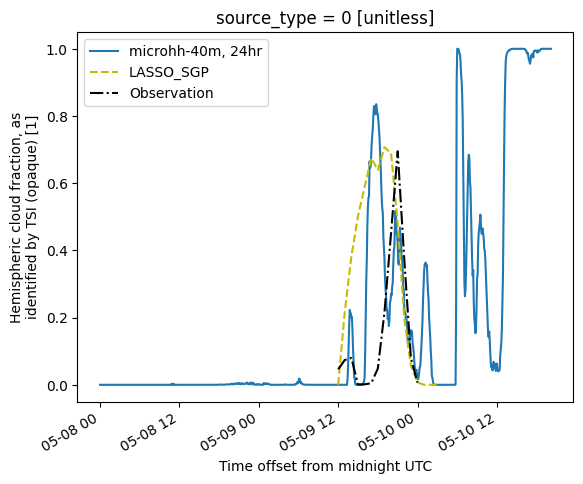

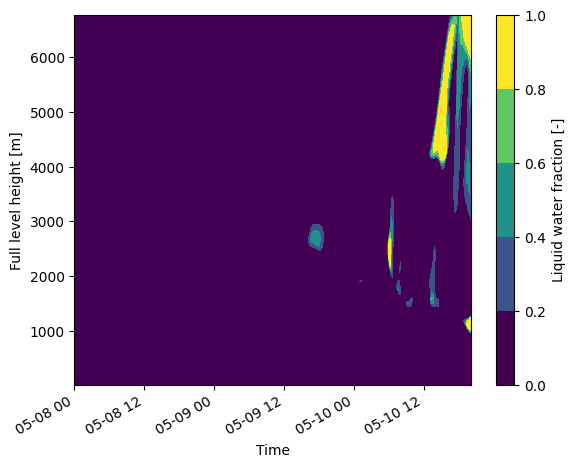

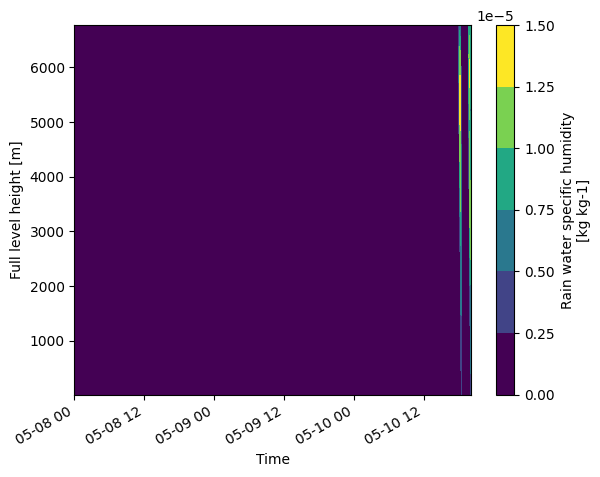

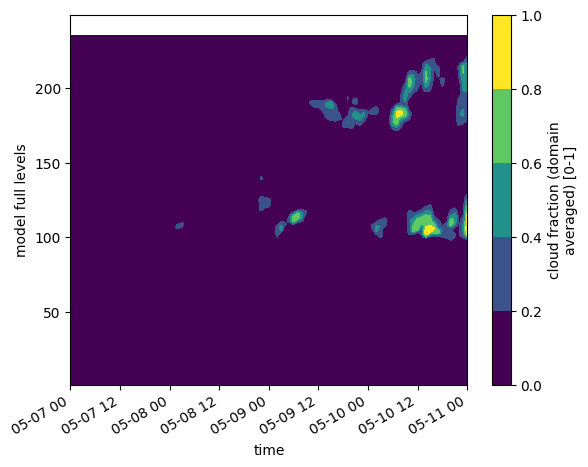

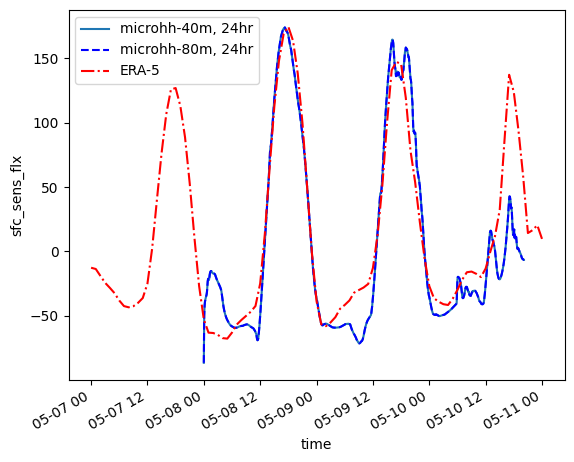

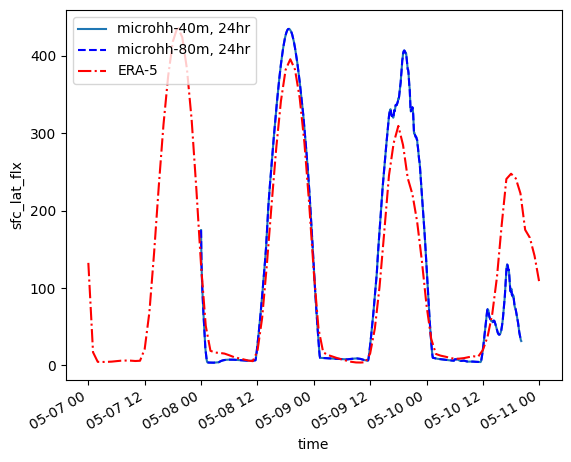

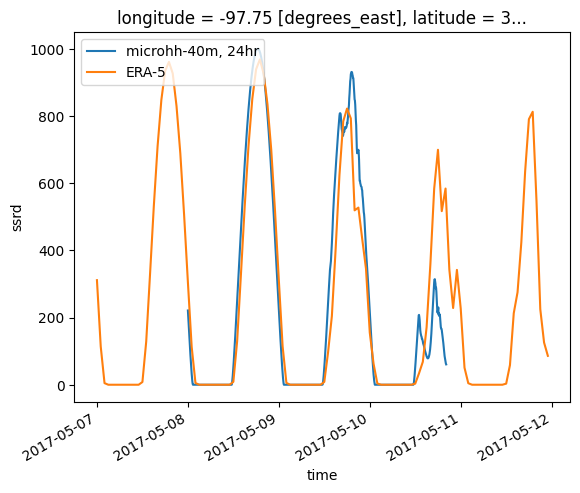

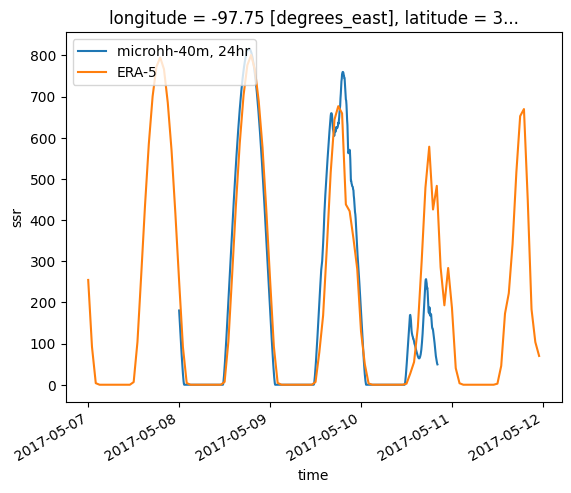

In [5]:
import xarray as xr
import matplotlib.pyplot as pl
import numpy as np

date_plot='20170509'

ncpath=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_24hrbefore_40m/'
ncpath1=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_nonudge/'
forcing_path='/fs/ess/PFS0220/LSM/SGP/forcings/'
ncfilename='eurec4a.default.0000000.nc'
ncfilename='SGP.default.0000000.nc'
forcing_filename=f'SGP_20170507.kpt.nc'

label1='microhh-40m, 24hr'
label2='microhh-80m, 24hr'
pwd='/fs/ess/PFS0220/LSM/SGP/SGP_obs/obs_model/'
date_plot='20170509'
sgpfilename=f'sgplassodiagobsmod2C1.m1.{date_plot}.000000.nc'
#ncfilename_2d=f'sgplassodiagobsmod2d2C1.m1.{date_plot}.000000.nc'


microhh_out1=xr.open_dataset(ncpath+ncfilename,decode_times=True)
microhh_out2=xr.open_dataset(ncpath+ncfilename,group='default',decode_times=True)
microhh_out3=xr.open_dataset(ncpath+ncfilename,group='thermo',decode_times=True)
microhh_out4=xr.open_dataset(ncpath+ncfilename,group='radiation',decode_times=True)
microhh_out5=xr.open_dataset(ncpath+ncfilename,group='land_surface',decode_times=True)

microhh_out=xr.merge([microhh_out1, microhh_out2, microhh_out3, microhh_out4, microhh_out5])


ncfilename='eurec4a.default.0000000.nc'
ncfilename='SGP.default.0000000.nc'
microhh_out1=xr.open_dataset(ncpath+ncfilename,decode_times=True)
microhh_out2=xr.open_dataset(ncpath+ncfilename,group='default',decode_times=True)
microhh_out3=xr.open_dataset(ncpath+ncfilename,group='thermo',decode_times=True)
microhh_out4=xr.open_dataset(ncpath+ncfilename,group='radiation',decode_times=True)
microhh_out5=xr.open_dataset(ncpath+ncfilename,group='land_surface',decode_times=True)

microhh_out_2=xr.merge([microhh_out1, microhh_out2, microhh_out3, microhh_out4, microhh_out5])

era5_forcing=xr.open_dataset(forcing_path+forcing_filename)
lasso_sgp=xr.open_dataset(pwd+sgpfilename,decode_times=True)

era_single=xr.open_dataset('/fs/ess/PFS0220/LSM/Jupyter_files/era_single_20170509.nc',decode_times=True)
era_single['ssrd']=era_single['ssrd']/3600
era_single['ssr']=era_single['ssr']/3600


pl.figure()
microhh_out['T'].isel(z=0,time=slice(24*12,84*12)).plot.line(label=label1)
lasso_sgp['temperature_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp['temperature_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
era5_forcing['t'].isel(nlev=233,time=slice(48,84)).plot.line('r--',label='ERA-5')
pl.legend(loc="lower right")

pl.figure()
microhh_out['T'].isel(z=0).plot.line(label=label1)
lasso_sgp['temperature_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp['temperature_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
era5_forcing['t'].isel(nlev=233,time=slice(0,84)).plot.line('r--',label='ERA-5')
pl.legend(loc="lower right")

pl.figure()
(microhh_out['ql_path']*1000).isel(time=slice(24*12,52*12)).plot.line(label=label1)
lasso_sgp['lwp'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp['lwp'].isel(source_type=0).plot.line('k-.',label='Observation')
pl.legend(loc="upper left")

pl.figure()
(microhh_out['qt']*1000).isel(z=0).plot.line(label=label1)
lasso_sgp['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
(era5_forcing['q']*1000).isel(nlev=233,time=slice(0,84)).plot.line('r--',label='ERA-5')
pl.ylabel('qt$_{Surface}$ (g kg$^{-1}$)')
pl.legend(loc="upper left")

pl.figure()
(microhh_out['qt']*1000).isel(z=0,time=slice(24*12,84*12)).plot.line(label=label1)
lasso_sgp['water_vapor_mixing_ratio_surface'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp['water_vapor_mixing_ratio_surface'].isel(source_type=0).plot.line('k-.',label='Observation')
(era5_forcing['q']*1000).isel(nlev=233,time=slice(48,76)).plot.line('r--',label='ERA-5')
pl.ylabel('qt$_{Surface}$ (g kg$^{-1}$)')
pl.legend(loc="upper left")

pl.figure()
(microhh_out['ql_cover']).plot.line(label=label1)
lasso_sgp['cloud_fraction_tsi'].isel(source_type=1).plot.line('y--',label='LASSO_SGP')
lasso_sgp['cloud_fraction_tsi'].isel(source_type=0).plot.line('k-.',label='Observation')
pl.legend(loc="upper left")

pl.figure()
microhh_out_2['ql_frac'].isel(z=slice(0,150)).transpose().plot.contourf()

pl.figure()
microhh_out['qr'].isel(z=slice(0,150)).transpose().plot.contourf()

pl.figure()
era5_forcing['cloud_fraction'].isel(nlev=slice(0,500),time=slice(0,108)).transpose().plot.contourf()



pl.figure()
microhh_out['H'].plot(label=label1)
microhh_out_2['H'].plot.line('b--',label=label2)
(era5_forcing['sfc_sens_flx']*-1).plot.line('r-.',label='ERA-5')
pl.legend(loc="upper left")

pl.figure()
microhh_out['LE'].plot(label=label1)
microhh_out_2['LE'].plot.line('b--',label=label2)
(-1*era5_forcing['sfc_lat_flx']).plot.line('r-.',label='ERA-5')
pl.legend(loc="upper left")

pl.figure()
microhh_out['sw_flux_dn'].isel(zh=0).plot(label=label1)
era_single['ssrd'].isel(latitude=1,longitude=1).plot(label='ERA-5')
pl.legend(loc="upper left")

pl.figure()
(microhh_out['sw_flux_dn']-microhh_out['sw_flux_up']).isel(zh=0).plot(label=label1)
era_single['ssr'].isel(latitude=1,longitude=1).plot(label='ERA-5')
pl.legend(loc="upper left")


<class 'netCDF4._netCDF4.Group'>
group /radiation:
    dimensions(sizes): 
    variables(dimensions): float64 lw_flux_up(time, zh), float64 lw_flux_dn(time, zh), float64 lw_flux_up_clear(time, zh), float64 lw_flux_dn_clear(time, zh), float64 sw_flux_up(time, zh), float64 sw_flux_dn(time, zh), float64 sw_flux_dn_dir(time, zh), float64 sw_flux_up_clear(time, zh), float64 sw_flux_dn_clear(time, zh), float64 sw_flux_dn_dir_clear(time, zh), float64 lw_flux_up_ref(p_rad), float64 lw_flux_dn_ref(p_rad), float64 sza(time), float64 sw_flux_dn_toa(time)
    groups: 


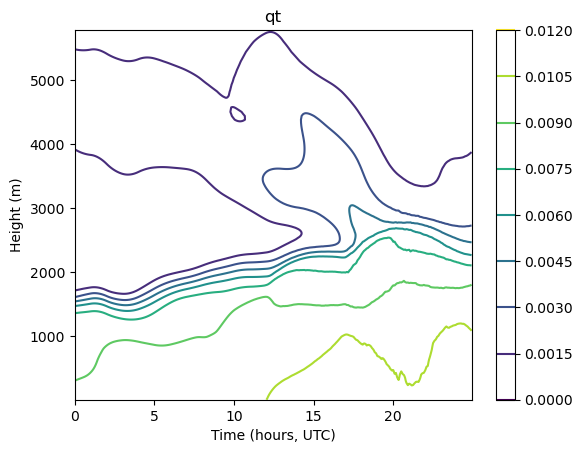

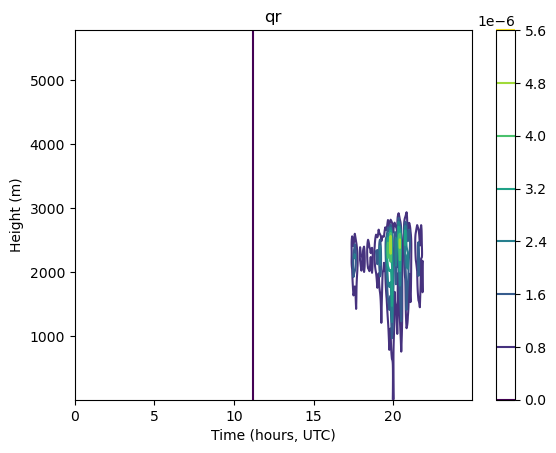

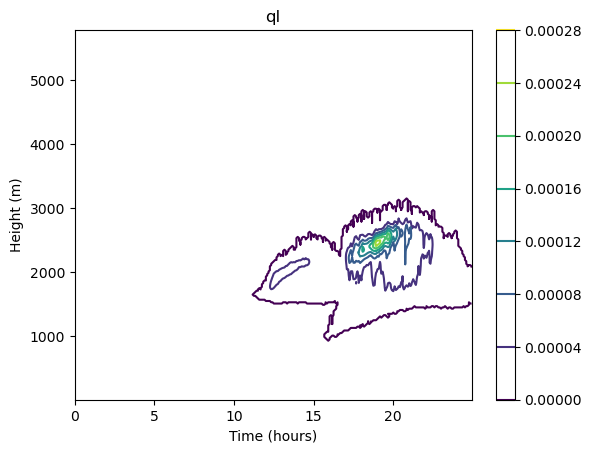

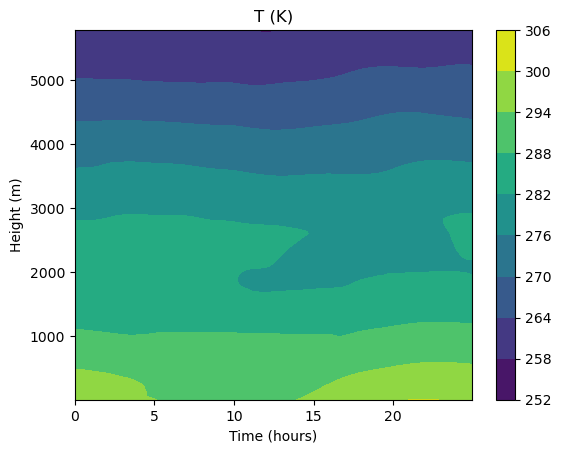

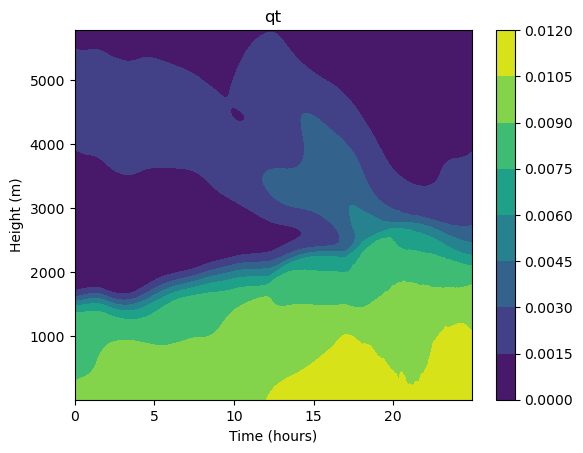

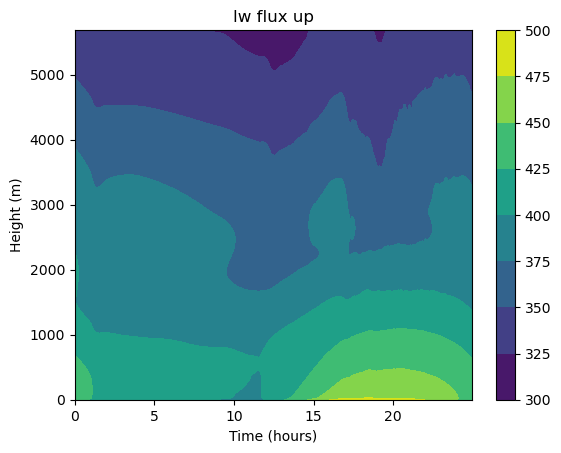

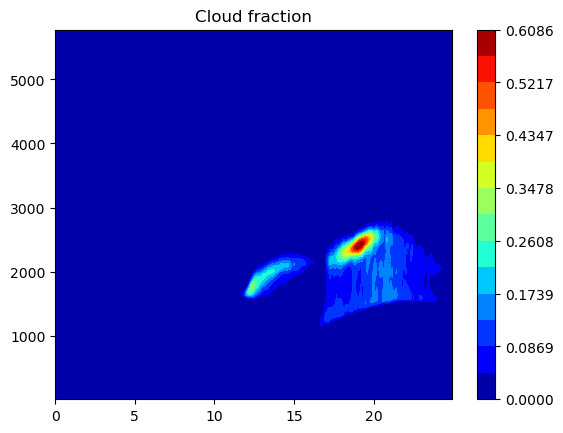

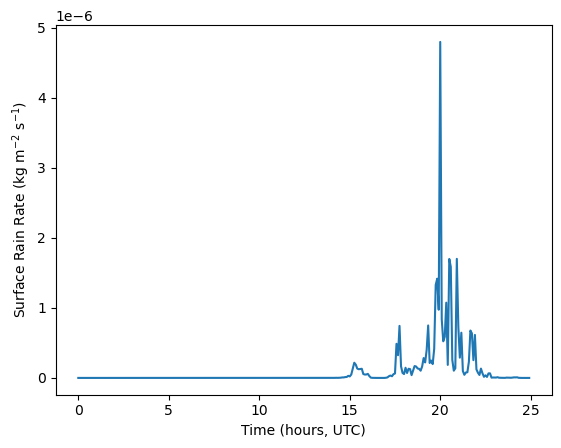

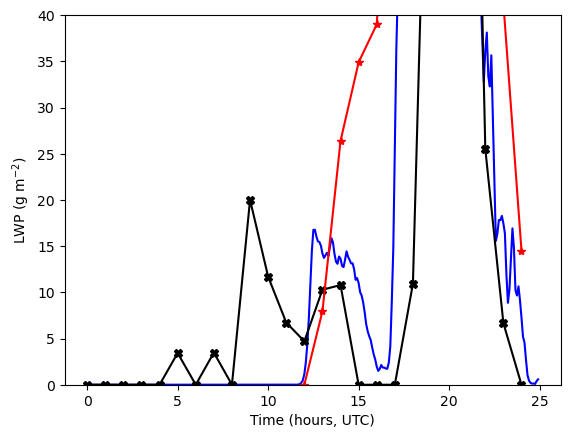

(0.0, 14.0)

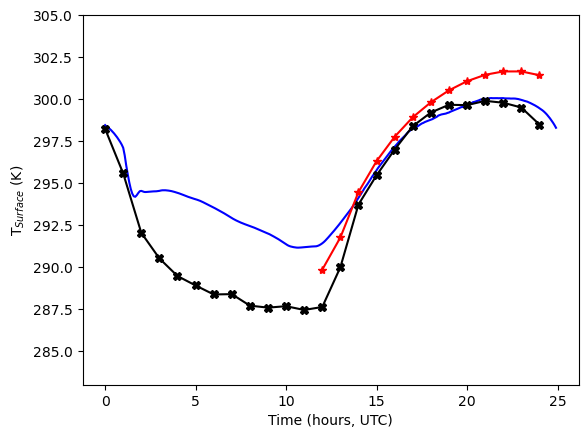

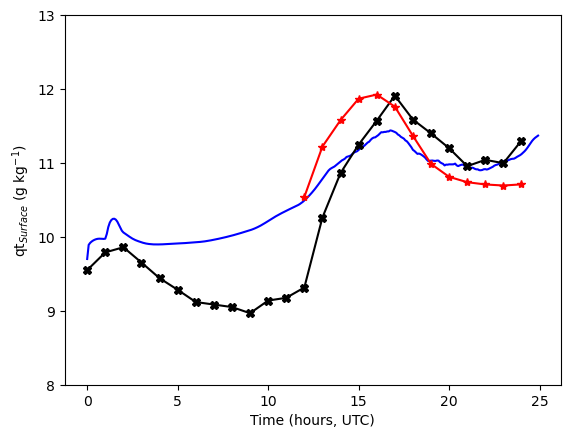

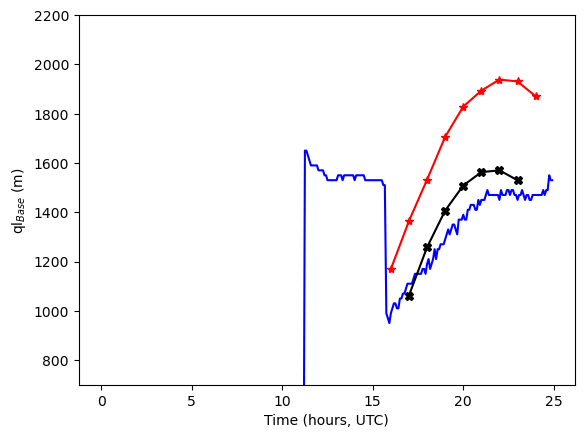

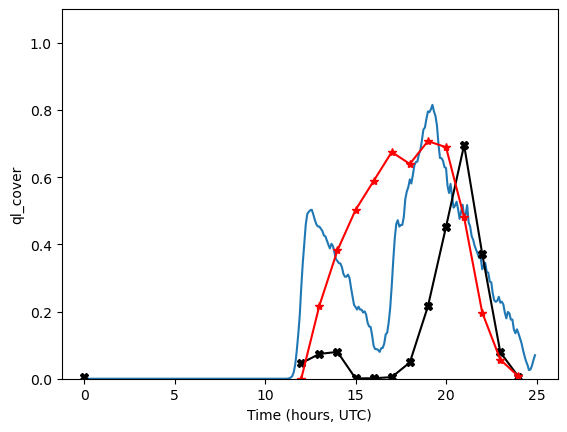

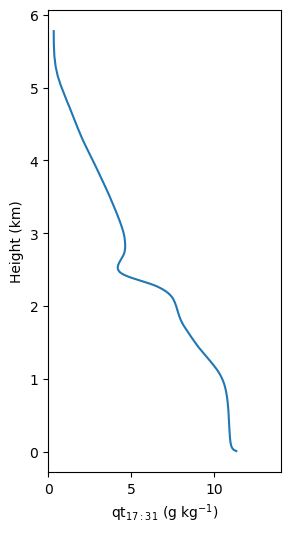

In [1]:
### Plot from 3 files ###
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime
from datetime import timedelta
from matplotlib import cm

date_plot='20170509'
pwd=f'/data/eurec4a/SGP/SGP_{date_plot}_lsm_nonudge/'
pwd=f'/data/eurec4a/SGP/SGP_{date_plot}_lsm_nudged/'
nc_nums=1;
nc_vals = ['0000']
#nc_vals = ['0000','0576','1152','1728','2304','2880']
#nc_vals = ['0000','1152','2304']
dz=40; 
start_time=datetime(2022,9,14,20)
for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    xrdata=xr.open_dataset(pwd+nc_filename,decode_times=False)
    xrdata_def=xr.open_dataset(pwd+nc_filename,group='default',decode_times=False);
    xrdata_thermo=xr.open_dataset(pwd+nc_filename,group='thermo',decode_times=False);
    xrdata_rad=xr.open_dataset(pwd+nc_filename,group='radiation',decode_times=False);

    z1=xrdata['z'].values
    zh1=xrdata['zh'].values
    time1=xrdata['time'].values
    qr1 = xrdata_thermo['qr'].values;
    ql1 = xrdata_thermo['ql'].values;
    qt1 = xrdata_thermo['qt'].values;
    u1 = xrdata_def['u'].values;
    ql_frac1 = xrdata_thermo['ql_frac'].values;
    rr1 = xrdata_thermo['rr'].values
    qlpath1=xrdata_thermo['ql_path']
    qr_flux1=xrdata_thermo['qr_flux'].values;
    p=xrdata_thermo['phydro'].values;
    qt_bot=xrdata_thermo['qt_bot'].values;
    T1=xrdata_thermo['T'].values;
    w=xrdata_def['w'].values;
    if n==0:
        z=z1; 
        zh=zh1; 
        time=time1;
        qr=qr1;
        ql=ql1;
        qt=qt1;
        u=u1;
        ql_frac=ql_frac1;
        rr=rr1;
        qlpath=qlpath1;
        qr_flux=qr_flux1;
        T=T1;
    else:
        z=np.concatenate((z,z1));
        zh=np.concatenate((zh,zh1));
        time=np.concatenate((time,time1));
        qr=np.concatenate((qr,qr1));
        ql=np.concatenate((ql,ql1));
        qt=np.concatenate((qt,qt1));
        u=np.concatenate((u,u1));
        ql_frac=np.concatenate((ql_frac,ql_frac1));
        rr=np.concatenate((rr,rr1));
        qlpath=np.concatenate((qlpath,qlpath1));
        qr_flux=np.concatenate((qr_flux,qr_flux1));
        T=np.concatenate((T,T1));
ql_base=np.zeros((len(time)))

for i in range(len(time)):
    if len(np.nonzero(ql[i,:])[0])==0:
        ql_base[i]=0;
    else:
        ql_base[i]=z[np.nonzero(ql[i,:])[0][0]]
ds=nc.Dataset(pwd+nc_filename)
print(ds.groups['radiation'])

time=time/3600
tp1=int(0*3600/300)
tp2=int(25*3600/300)
mean_height=332.75;mean_height=0;

t_rad=np.absolute(time*3600-(17*60+31)*60).argmin()
time=(time)
z_ind=np.absolute(z-6000).argmin()
###################### read obs and lasso model data ###################################
pwd='/data/eurec4a/SGP_obs/obs_model/'
ncfilename=f'sgplassodiagobsmod2C1.m1.{date_plot}.000000.nc'
all_data_obs=xr.open_dataset(pwd+ncfilename,decode_times=False)
time_obs=all_data_obs['time'].values; time_obs=time_obs/3600;
lwp_obs=all_data_obs['lwp'].values;
Ts_obs=all_data_obs['temperature_surface'].values;
qs_obs=all_data_obs['water_vapor_mixing_ratio_surface'].values;
ql_base_obs=all_data_obs['cloud_base_height'].values;
ql_cover_obs=all_data_obs['cloud_fraction_tsi'].values;
to1=0; to2=25;

############### contour plots ###############################
pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(qt[tp1:tp2,0:z_ind]))
pl.title('qt')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(qr[tp1:tp2,0:z_ind]))
pl.title('qr')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(ql[tp1:tp2,0:z_ind]))
pl.title('ql')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(T[tp1:tp2,0:z_ind]))
pl.title('T (K)')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(qt[tp1:tp2,0:z_ind]))
pl.title('qt')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],zh[0:z_ind],np.transpose(xrdata_rad['lw_flux_up'].values[tp1:tp2,0:z_ind]))
pl.title('lw flux up')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

dt_array=np.array([start_time + timedelta(hours=i) for i in time])
levs=np.linspace(0,np.max(ql_frac[tp1:tp2,0:z_ind]),15)
levs_abs=np.concatenate((np.linspace(0,0.9,15),np.linspace(0.91,1.1,2)))
pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(ql_frac[tp1:tp2,0:z_ind]),levels=levs,cmap=cm.jet)
pl.title('Cloud fraction')
pl.colorbar()

############## line plots ########################################
pl.figure()
pl.plot(time[tp1:tp2],rr[tp1:tp2])
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Surface Rain Rate (kg m$^{-2}$ s$^{-1}$)')

pl.figure()
pl.plot(time[tp1:tp2],qlpath[tp1:tp2]*1000,'b-')
pl.plot(time_obs[to1:to2],lwp_obs[to1:to2,0],'k-',time_obs[to1:to2],lwp_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],lwp_obs[to1:to2,1],'r-',time_obs[to1:to2],lwp_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('LWP (g m$^{-2}$)')
pl.ylim([0,40])
pl.show()

pl.figure()
pl.plot(time[tp1:tp2],T[tp1:tp2,0],'b-')
pl.plot(time_obs[to1:to2],Ts_obs[to1:to2,0],'k-',time_obs[to1:to2],Ts_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],Ts_obs[to1:to2,1],'r-',time_obs[to1:to2],Ts_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('T$_{Surface}$ (K)')
pl.ylim([283,305])

pl.figure()
pl.plot(time[tp1:tp2],qt[tp1:tp2,0]*1000,'b-')
pl.plot(time_obs[to1:to2],qs_obs[to1:to2,0],'k-',time_obs[to1:to2],qs_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],qs_obs[to1:to2,1],'r-',time_obs[to1:to2],qs_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('qt$_{Surface}$ (g kg$^{-1}$)')
pl.ylim([8,13])

pl.figure()
pl.plot(time[tp1:tp2],ql_base[tp1:tp2]+mean_height,'b-')
pl.plot(time_obs[to1:to2],ql_base_obs[to1:to2,0],'k-',time_obs[to1:to2],ql_base_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],ql_base_obs[to1:to2,1],'r-',time_obs[to1:to2],ql_base_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('ql$_{Base}$ (m)')
pl.ylim([700,2200])
#pl.figure()
#pl.plot(xrdata['time'].values,xrdata_rad['sw_flux_dn_toa'].values)

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600,xrdata_thermo['ql_cover'].values[tp1:tp2])
pl.plot(time_obs[to1:to2],ql_cover_obs[to1:to2,0],'k-',time_obs[to1:to2],ql_cover_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],ql_cover_obs[to1:to2,1],'r-',time_obs[to1:to2],ql_cover_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('ql_cover')
pl.ylim([0,1.1])

########### Radiosonde #################################
fig = pl.figure(figsize=(3,6))
pl.plot(qt[t_rad,0:z_ind]*1000,(z[0:z_ind]+mean_height)/1000)
pl.ylabel('Height (km)')
pl.xlabel('qt$_{17:31}$ (g kg$^{-1}$)')
pl.xlim([0,14])










[1.89 0.72 0.21 0.07]
[0.18433057 0.18433057 0.18433057 0.18433057 0.18433057 0.18433057
 0.18433057 0.18433057 0.18433057 0.18433057 0.18420536 0.18420536
 0.18420536 0.18420536 0.18420536 0.18420536 0.18420536 0.18420536
 0.18420536 0.18420536 0.18420536 0.18420536 0.18407398 0.18407398
 0.18407403 0.18407403 0.18407403 0.18407403 0.18407403 0.18407403
 0.18407403 0.18407403 0.18407403 0.18407403 0.18394508 0.18394508
 0.18394508 0.18394508 0.18394508 0.18394508 0.18394508 0.18394508
 0.18394508 0.18394508 0.18394508 0.18394508 0.18381621 0.18381621
 0.18381618 0.18381618 0.18381618 0.18381618 0.18381618 0.18381618
 0.18381618 0.18381618 0.18381618 0.18381618 0.1836895  0.1836895
 0.1836895 ]


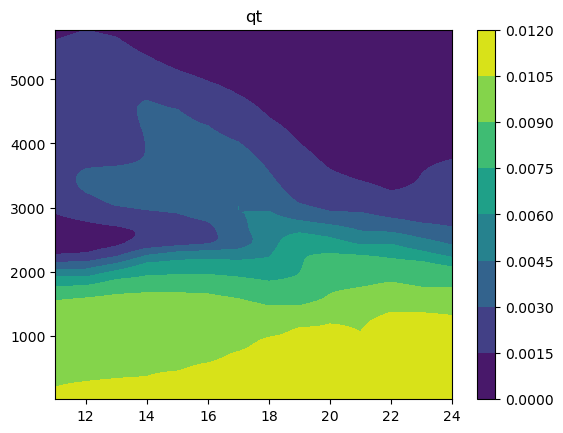

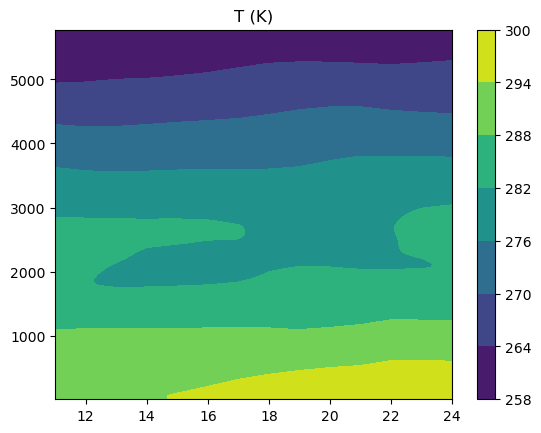

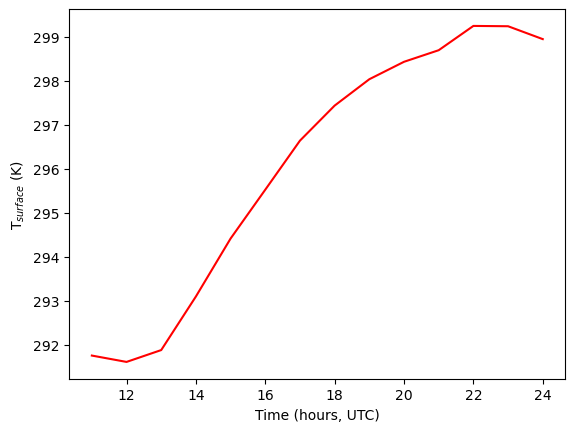

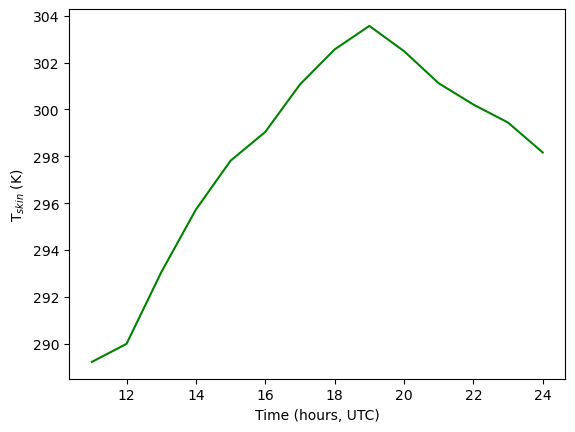

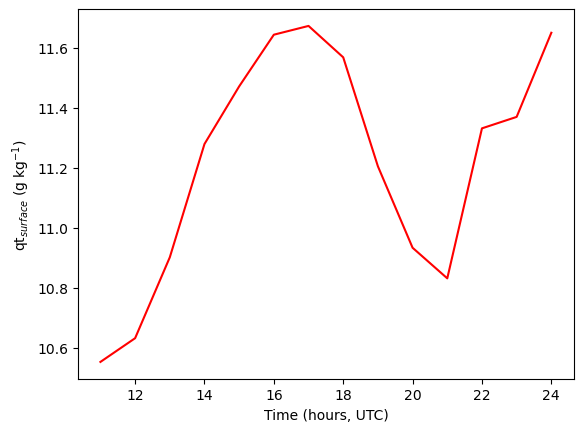

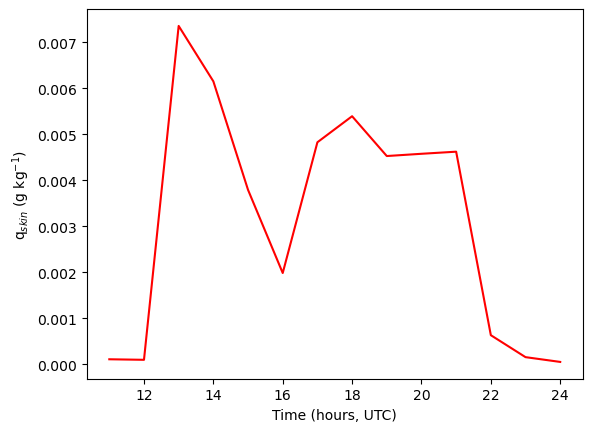

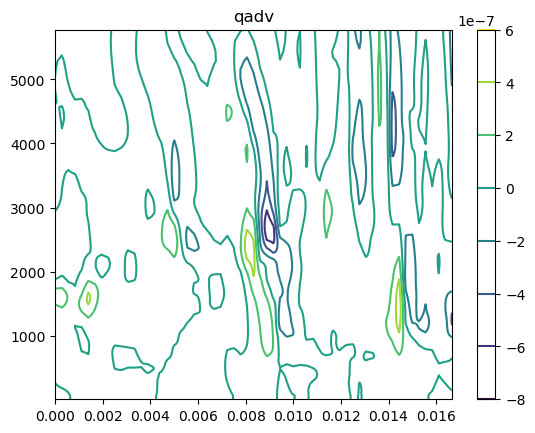

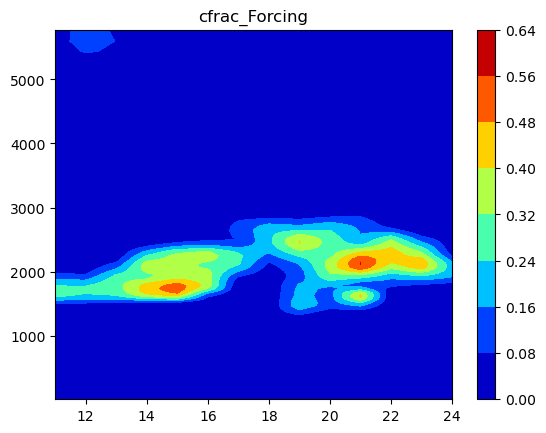

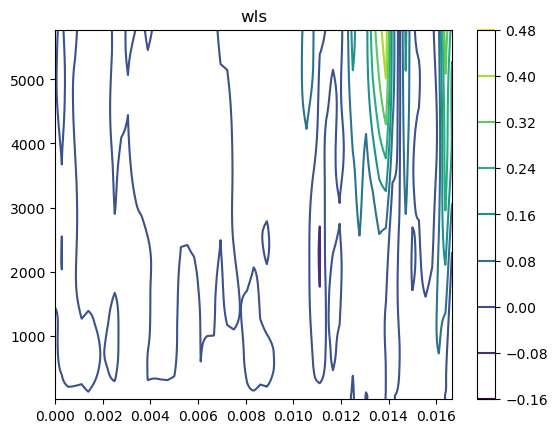

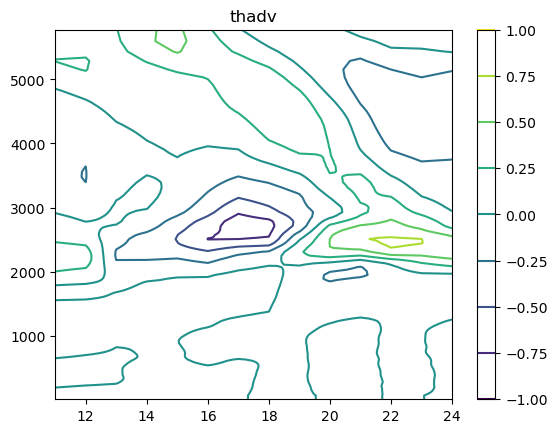

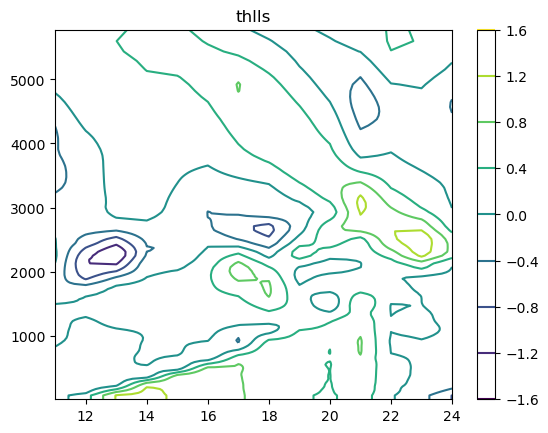

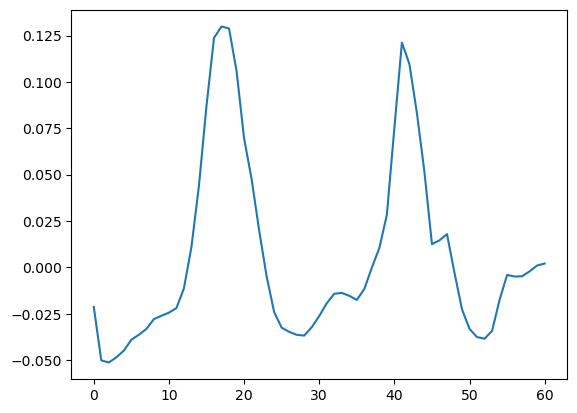

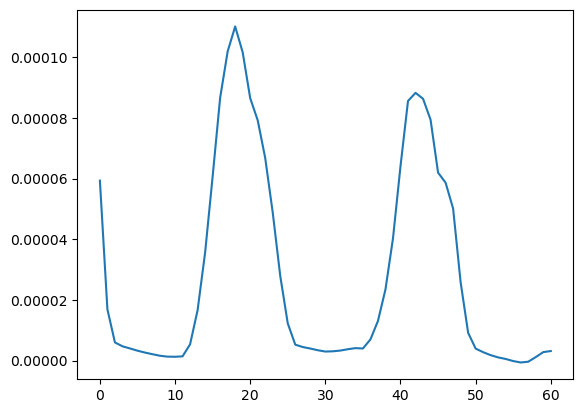

In [1]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as pl
import numpy as np
import metpy.calc as mpcalc
import metpy
import math
import statistics
from matplotlib import cm
from metpy.units import units
#netcdf_path='/data/eurec4a/data/forcings/new_domain.kpt.nc'
#netcdf_path='/data/eurec4a/data/forcings/SEUS_09142022.kpt.nc'
netcdf_path='/data/eurec4a/data/forcings/SGP_05092017.kpt.nc'
all_data = xr.open_dataset(netcdf_path,decode_times=False)
ts = 0;
all_data = xr.open_dataset(netcdf_path,decode_times=False)
time = all_data['time'].values[0:];
tn=all_data['time'].values[:].size 
pres0_m=all_data['ps'].values[0:];
select_arr=np.logical_and(np.logical_not(np.isnan(pres0_m)),(time>=time[ts]))
time2 = time[select_arr]
qadv_un=all_data['qadv'].values[select_arr,:];         qadv_un=np.flip(qadv_un, axis=1);
tadv_un=all_data['tadv'].values[select_arr,:];         tadv_un=np.flip(tadv_un, axis=1);
time = all_data['time'].values[select_arr];
qt_un=all_data['q'].values[select_arr,:];              qt_un=np.flip(qt_un, axis=1);
ql_un=all_data['ql'].values[select_arr,:];             ql_un=np.flip(ql_un, axis=1)
pres_un=all_data['pres'].values[select_arr,:];         pres_un=np.flip(pres_un, axis=1)
pres0=all_data['ps'].values[select_arr];
sst=all_data['t_skin'].values[select_arr];
T_un=all_data['t'].values[select_arr,:];               T_un=np.flip(T_un, axis=1);
zun=all_data['zf'].values[select_arr,:];         zun=np.flip(zun, axis=1);
omega_un = all_data['omega'].values[select_arr,:];     omega_un=np.flip(omega_un, axis=1);
omg=all_data['sfc_lat_flx']; 
qad=all_data['qadv'];
mom_rough=all_data['mom_rough'].values; 
heat_rough=all_data['heat_rough'].values; 
q_skin=all_data['q_skin'].values[select_arr]; 
u_un=all_data['u'].values[select_arr,:];                   u_un=np.flip(u_un, axis=1);
v_un=all_data['v'].values[select_arr,:];                   v_un=np.flip(v_un, axis=1);
ug_un=all_data['ug'].values[select_arr,:];                   ug_un=np.flip(ug_un, axis=1);
vg_un=all_data['vg'].values[select_arr,:];                   vg_un=np.flip(vg_un, axis=1);
cloud_frac_un=all_data['cloud_fraction'].values[select_arr,:]; cloud_frac_un=np.flip(cloud_frac_un, axis=1);
o3_un=all_data['o3'].values[select_arr,:];                   o3=np.flip(o3_un, axis=1);
mean_height=all_data['orog'].values[:]; 
h_soil=all_data['h_soil'].values[:];
print(h_soil[::-1]) 
dz_fine = 40;
z_fine_top = 6000.;
k_fine = z_fine_top/dz_fine;
z1 = np.linspace(0.5*dz_fine, z_fine_top-0.5*dz_fine, int(k_fine));


tttt=time[0]
z_coarse_top = 32001;
dz_coarse = 1000;
z2 = np.arange(z_fine_top, z_coarse_top, dz_coarse)
z = np.concatenate((z1, z2))

z_new=np.zeros(300)
z_abs=10
dz=20;
for i in range(0,z_new.size): 
    if i>200:
        dz=dz+int(round(0.1*dz,0));
    z_new[i] = z_abs;
    z_abs = z_abs+dz
    
z=z_new[0:252]
zh = 0.5*(z[:-1] + z[1:])
zh = np.append(0., zh)
zh = np.append(zh, z.size)

lon = all_data['lon'].values[select_arr]; #lon = 360 - lon;
print(all_data['albedo'].values[select_arr])
lat = all_data['lat'].values[select_arr];
H=all_data['sfc_sens_flx'].values[select_arr];
L = all_data['sfc_lat_flx'].values[select_arr];
time = time - time[0];
time_full=all_data['date'].values;
qs=all_data['q_skin'].values[select_arr];
ts=all_data['t_skin'].values[select_arr];
hs=all_data['h_soil'].values;
u = np.zeros((time.size, z.size))
v = np.zeros((time.size, z.size))
ug = np.zeros((time.size, z.size))
vg = np.zeros((time.size, z.size))
th = np.zeros(np.shape(u))
thl   = np.zeros(np.shape(u))
thlls = np.zeros(np.shape(u))
pres = np.zeros(np.shape(u))
T = np.zeros(np.shape(u))
qt = np.zeros(np.shape(u))
ql = np.zeros(np.shape(u))
qadv=np.zeros(np.shape(u))
tadv=np.zeros(np.shape(u))
qtls=np.zeros(np.shape(u))
uls=np.zeros(np.shape(u))
vls=np.zeros(np.shape(u))
o3=np.zeros(np.shape(u))
qt_dqdt=np.zeros(np.shape(u))
omega = np.zeros(np.shape(u))
wls = np.zeros((time.size, z.size+1))
w = np.zeros(np.shape(u))
cloud_frac=np.zeros(np.shape(u))
sbotqt = np.zeros(time.size)
th_diff = np.zeros(time.size)
qt_diff = np.zeros(time.size)
U = np.zeros(time.size) 
fc = np.zeros(time.size)
cp  = 1005.
Lv  = 2.5e6
Rd  = 287.


for n in range(0,time.size):
    zun[n,:]=zun[n,:]-mean_height[n]
    interp_arr=(np.logical_not(np.isnan(zun[n,:])))
    qt[n,:] = np.interp(z,zun[n,interp_arr],qt_un[n,interp_arr])
    ql[n,:] = np.interp(z,zun[n,interp_arr],ql_un[n,interp_arr])
    qadv[n,:] = np.interp(z,zun[n,interp_arr],qadv_un[n,interp_arr])
    tadv[n,:] = np.interp(z,zun[n,interp_arr],tadv_un[n,interp_arr])
    pres[n,:] = np.interp(z,zun[n,interp_arr],pres_un[n,interp_arr])
    T[n,:] = np.interp(z,zun[n,interp_arr],T_un[n,interp_arr])
    omega[n,:] = np.interp(z,zun[n,interp_arr],omega_un[n,interp_arr])
    u[n,:] = np.interp(z,zun[n,interp_arr],u_un[n,interp_arr])
    v[n,:] = np.interp(z,zun[n,interp_arr],v_un[n,interp_arr])
    ug[n,:] = np.interp(z,zun[n,interp_arr],ug_un[n,interp_arr])
    vg[n,:] = np.interp(z,zun[n,interp_arr],vg_un[n,interp_arr])
    cloud_frac[n,:] = np.interp(z,zun[n,interp_arr],cloud_frac_un[n,interp_arr])
    o3[n,:] = np.interp(z,zun[n,interp_arr],o3_un[n,interp_arr])


######################################################################################
z_top = 70.e3
dz = 500.
z_rad  = np.arange(dz/2, z_top, dz)
z_rad = z_new
zh_rad = np.arange(   0, z_top-dz/2, dz)
zh_rad = np.append(zh_rad, z_top)

zh_rad = 0.5*(z_rad[:-1] + z_rad[1:])
zh_rad= np.append(0., zh_rad)
zh_rad = np.append(zh_rad, z_abs)

zun_rad=zun[0,:]-mean_height[0]
interp_rad=(np.logical_not(np.isnan(zun_rad)))
p_lay = np.interp(z_rad,zun_rad[interp_rad],pres_un[0,interp_rad])
p_lev = np.interp(zh_rad,zun_rad[interp_rad],pres_un[0,interp_rad])
T_lay = np.interp(z_rad,zun_rad[interp_rad],T_un[0,interp_rad])
T_lev = np.interp(zh_rad,zun_rad[interp_rad],T_un[0,interp_rad])
qt_rad=np.zeros(z_rad.size); o3_rad=np.zeros(z_rad.size);
qt_rad[:] = np.interp(z_rad,zun_rad[interp_rad],qt_un[0,interp_rad])
######################################################################################

p_sbot = pres0;
for n in range(0,time.size):
    sat_r = mpcalc.saturation_mixing_ratio(pres0[n] * units.pascal , sst[n]* units.kelvin)
    fc[n] = mpcalc.coriolis_parameter(lat[n]*units.degrees) * units.second
    fc_cal = mpcalc.coriolis_parameter(34.5*units.degrees) * units.second
    sbotqt[n] = mpcalc.specific_humidity_from_mixing_ratio(sat_r)
    for k in range(0,z.size):
        mix_ratio = mpcalc.mixing_ratio_from_specific_humidity(qt[n,k])
        w[n,k] = mpcalc.vertical_velocity(omega[n,k] * units.pascal / units.second, pres[n,k] * units.pascal, T[n,k] * units.kelvin, mix_ratio) / (units.meter / units.second)
        th[n,k] = mpcalc.potential_temperature(pres[n,k] * units.pascal, T[n,k] * units.kelvin) / units.kelvin
        thl[n,k] = th[n,k] - (th[n,k]/T[n,k]) * (Lv/cp) * (ql[n,k]/(1-qt[n,k]))

tv = T * (1 + 0.61 * qt)
rho_arr = pres / (Rd * tv)
thlin = T * (1.e5/pres)**(Rd/cp)
win = -omega / (rho_arr*9.81)

for n in range(0,time.size-1):
    thlls[n,:] = (th[n+1,:]-th[n,:])/(time[n+1]-time[n])
    qtls[n,:] = (qt[n+1,:]-qt[n,:])/(time[n+1]-time[n])
    uls[n,:] = (u[n+1,:]-u[n,:])/(time[n+1]-time[n])
    vls[n,:] = (v[n+1,:]-v[n,:])/(time[n+1]-time[n])
    wls_un = (w[n+1,:]-w[n,:])/(time[n+1]-time[n])
    wls[n,:] = np.interp(zh,z,wls_un)
wls[time.size-1,:] = wls[time.size-2,:]
uls[time.size-1,:] = uls[time.size-2,:]
vls[time.size-1,:] = vls[time.size-2,:]
qtls[time.size-1,:] = qtls[time.size-2,:]
thlls[time.size-1,:] = thlls[time.size-2,:]
qt_dqdt[0,:] = qt[0,:];
for i in range(0,time.size-1):
    for j in range(0,z.size):
        qt_dqdt[i+1,:] = qt_dqdt[i,:] + qtls[i,:] * (time[n+1]-time[n])

##### Fluxes ################
Ch=0.001094; Cq=0.001133
rhosurf = pres0 / (Rd * thl[:,0] * (1. + 0.61 * qt[:,0]))
qtbot = -L / (rhosurf * Lv) #J/m2s / (J/m3) --> m/s
sbotthl = -H / (rhosurf * cp) # K m/s
ths = sst / (p_sbot/1.e5)**(287.04/1005.)


for n in range(time.size):
    th_diff[n] = th[n,0]-ths[n]
    qt_diff[n] = qt[n,0]-q_skin[n]
    U[n]=math.sqrt(u[n,0]**2+v[n,0]**2)

#sh_flx = -Ch * U * th_diff
#lat_flx = -Cq * U * qt_diff
sh_flx=sbotthl
lat_flx=qtbot
aa = thlls/tadv

time=time/3600
tp1=np.nonzero(time==11)[0][0]; tp2=np.nonzero(time==25)[0][0];
z_plot=np.absolute(z-6000).argmin()


pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_plot],np.transpose(qt[tp1:tp2,0:z_plot]))
pl.title('qt')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_plot],np.transpose(T[tp1:tp2,0:z_plot]))
pl.title('T (K)')
pl.colorbar()

pl.figure()
pl.plot(time[tp1:tp2],T[tp1:tp2,0],'r-')
pl.ylabel('T$_{surface}$ (K)')
pl.xlabel('Time (hours, UTC)')

pl.figure()
pl.plot(time[tp1:tp2],sst[tp1:tp2],'g-')
pl.ylabel('T$_{skin}$ (K)')
pl.xlabel('Time (hours, UTC)')

pl.figure()
pl.plot(time[tp1:tp2],qt[tp1:tp2,0]*1000,'r-')
pl.ylabel('qt$_{surface}$ (g kg$^{-1}$)')
pl.xlabel('Time (hours, UTC)')

pl.figure()
pl.plot(time[tp1:tp2],qs[tp1:tp2]*1000,'r-')
pl.ylabel('q$_{skin}$ (g kg$^{-1}$)')
pl.xlabel('Time (hours, UTC)')

pl.figure()
pl.contour(time/3600,z[0:z_plot],np.transpose(qadv[:,0:z_plot]))
pl.title('qadv')
pl.colorbar()

levs_abs=np.concatenate((np.linspace(0,0.9,15),np.linspace(0.91,1.1,2)))
pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_plot],np.transpose(cloud_frac[tp1:tp2,0:z_plot]),cmap=cm.jet)
pl.title('cfrac_Forcing')
pl.colorbar()



pl.figure()
pl.contour(time/3600,z[0:z_plot],np.transpose(w[:,0:z_plot]))
pl.title('wls')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_plot],np.transpose(tadv[tp1:tp2,0:z_plot]*3600))
pl.title('thadv')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_plot],np.transpose(thlls[tp1:tp2,0:z_plot]*3600))
pl.title('thlls')
pl.colorbar()

pl.figure()
pl.plot(sh_flx)

pl.figure()
pl.plot(lat_flx)


<class 'netCDF4._netCDF4.Group'>
group /land_surface:
    dimensions(sizes): 
    variables(dimensions): float64 ustar(time), float64 obuk(time), float64 wl(time), float64 H(time), float64 LE(time), float64 G(time), float64 S(time), float64 t(time, zs), float64 theta(time, zs)
    groups: 


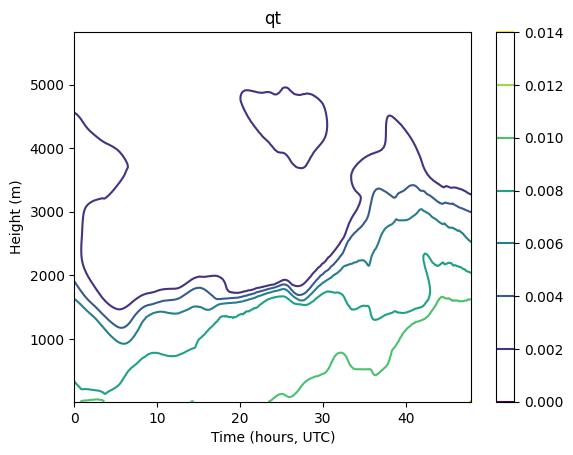

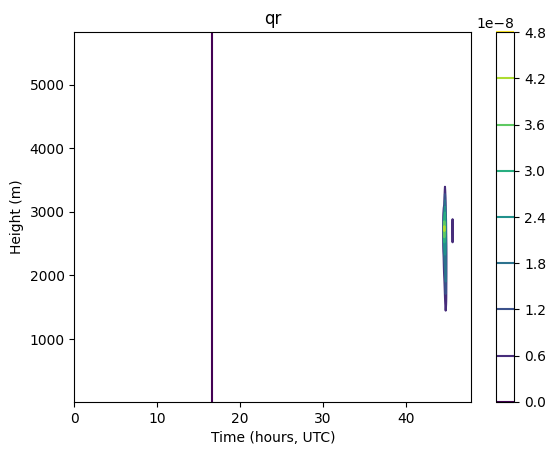

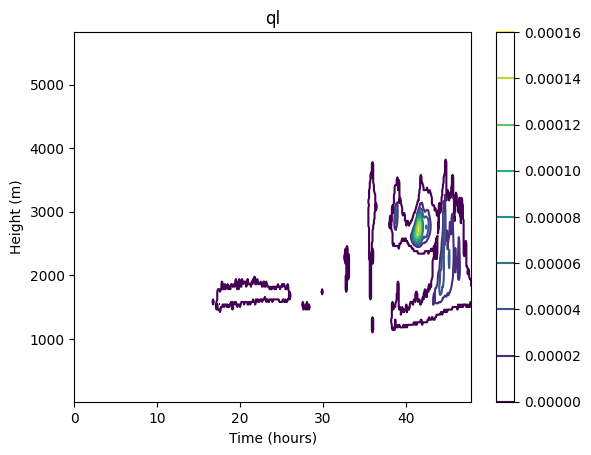

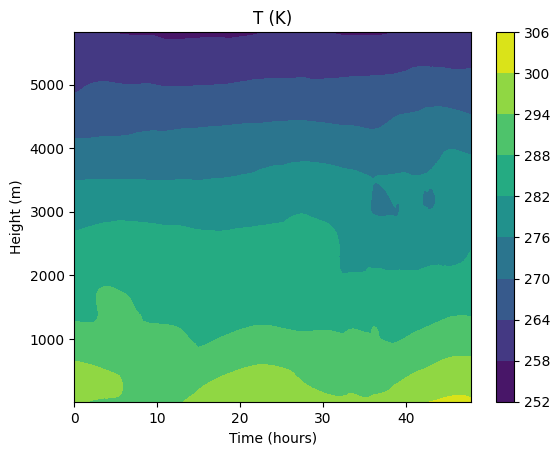

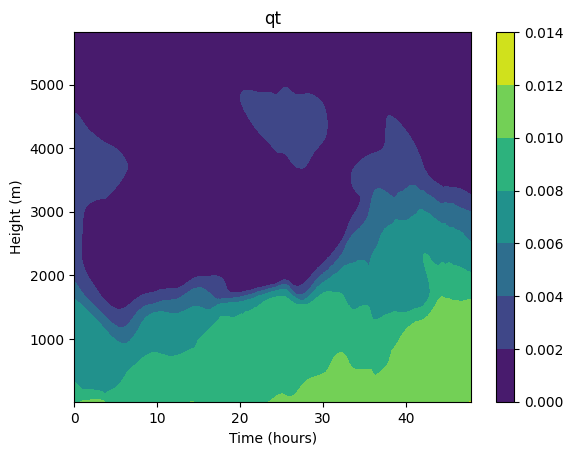

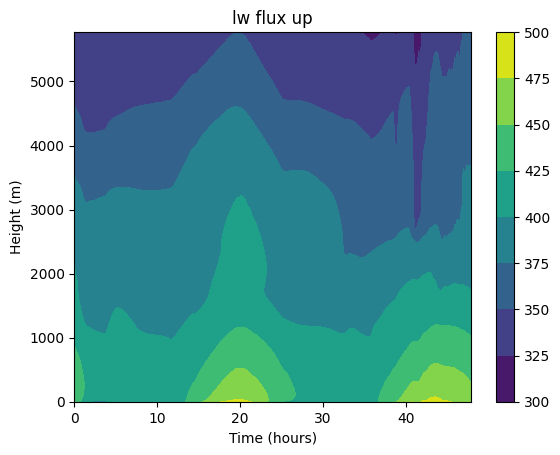

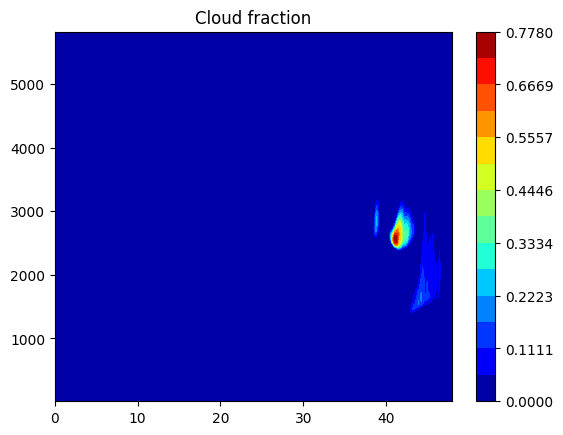

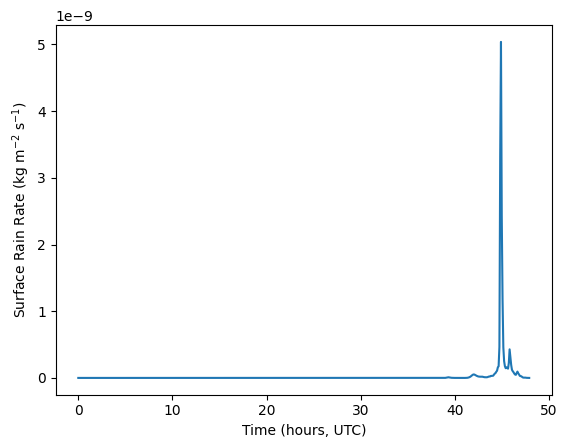

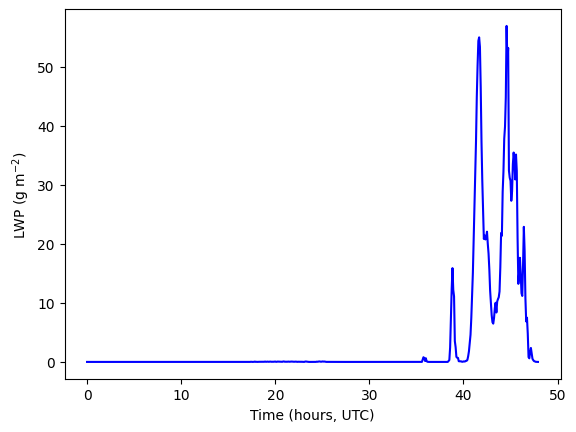

Text(0, 0.5, 'SH-Flux$_{surface}$')

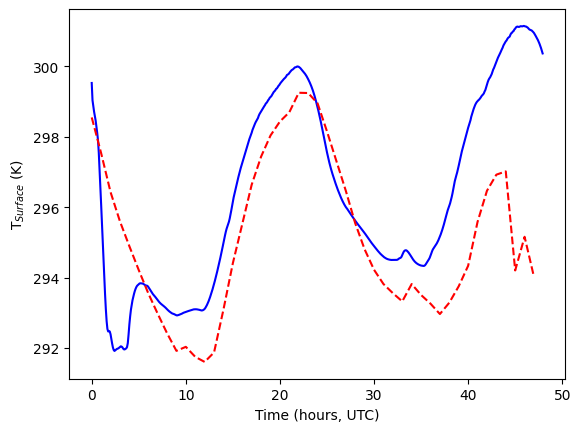

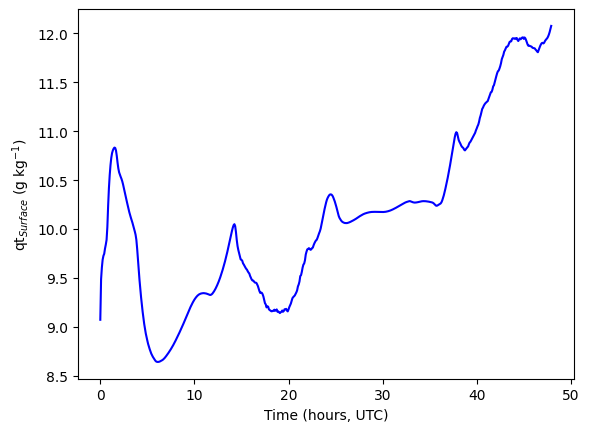

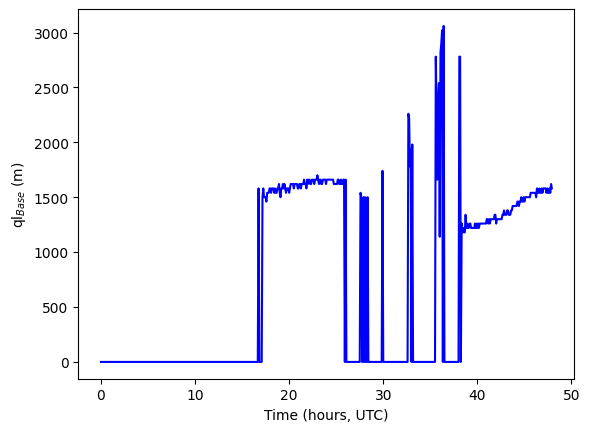

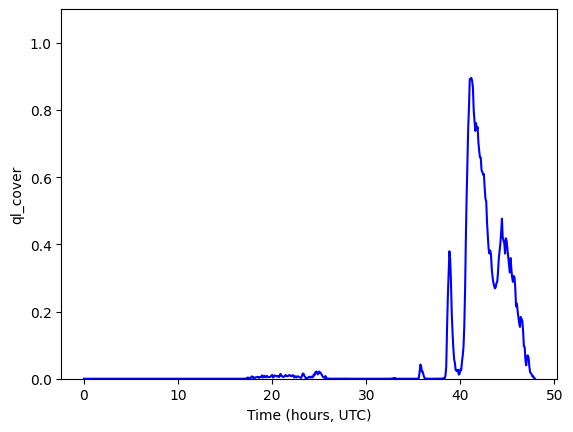

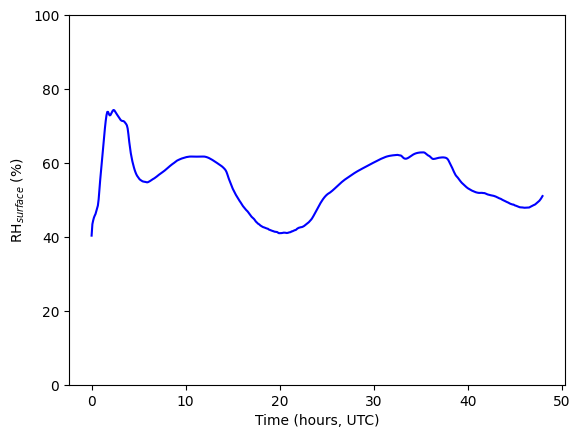

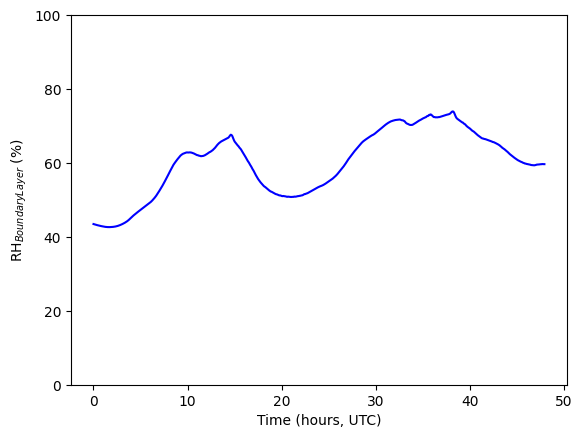

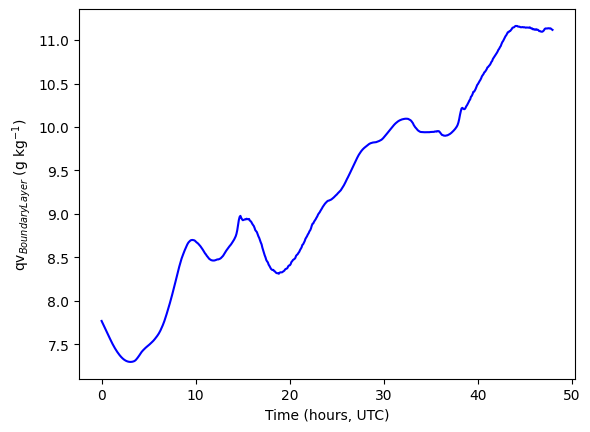

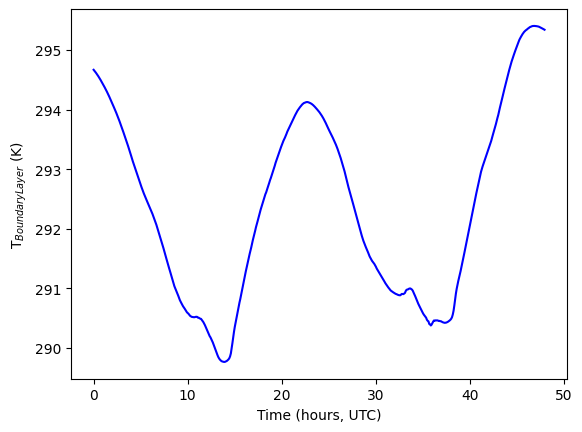

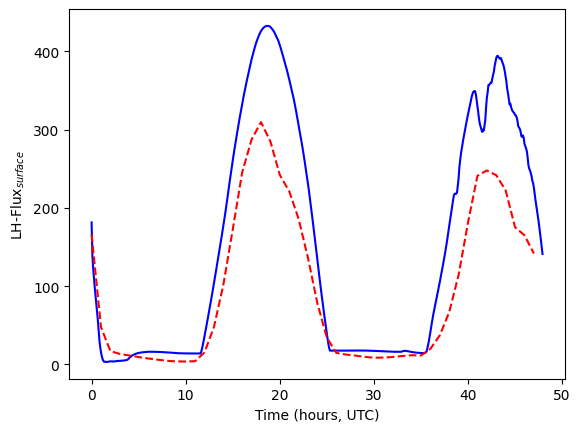

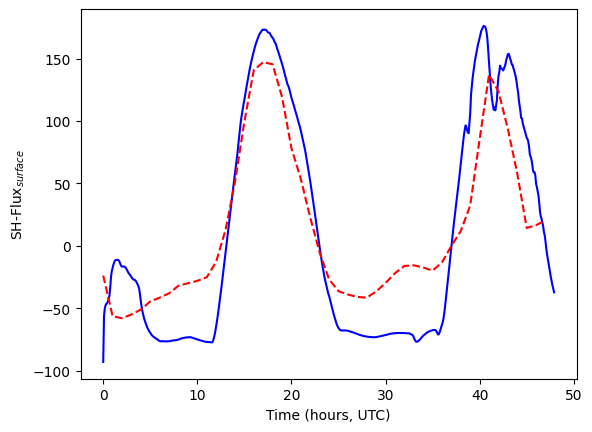

In [5]:
### Plot from 3 files ###
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime
from datetime import timedelta
from matplotlib import cm

date_plot='20170509'
pwd=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_24hrbefore/'
pwd=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_24hrbefore/'
#pwd=f'/data/eurec4a/SGP/SGP_{date_plot}_lsm_nudged/'

nc_nums=1;
nc_vals = ['0000']
#nc_vals = ['0000','0576','1152','1728','2304','2880']
#nc_vals = ['0000','1152','2304']
dz=40; 
start_time=datetime(2022,9,14,20)
for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    xrdata=xr.open_dataset(pwd+nc_filename,decode_times=False)
    xrdata_def=xr.open_dataset(pwd+nc_filename,group='default',decode_times=False);
    xrdata_thermo=xr.open_dataset(pwd+nc_filename,group='thermo',decode_times=False);
    xrdata_rad=xr.open_dataset(pwd+nc_filename,group='radiation',decode_times=False);
    xrdata_lsm=xr.open_dataset(pwd+nc_filename,group='land_surface',decode_times=False);

    z1=xrdata['z'].values
    zh1=xrdata['zh'].values
    time1=xrdata['time'].values
    qr1 = xrdata_thermo['qr'].values;
    ql1 = xrdata_thermo['ql'].values;
    qt1 = xrdata_thermo['qt'].values;
    u1 = xrdata_def['u'].values;
    ql_frac1 = xrdata_thermo['ql_frac'].values;
    rr1 = xrdata_thermo['rr'].values
    qlpath1=xrdata_thermo['ql_path']
    qr_flux1=xrdata_thermo['qr_flux'].values;
    p=xrdata_thermo['phydro'].values;
    qt_bot=xrdata_thermo['qt_bot'].values;
    T1=xrdata_thermo['T'].values;
    w=xrdata_def['w'].values;
    if n==0:
        z=z1; 
        zh=zh1; 
        time=time1;
        qr=qr1;
        ql=ql1;
        qt=qt1;
        u=u1;
        ql_frac=ql_frac1;
        rr=rr1;
        qlpath=qlpath1;
        qr_flux=qr_flux1;
        T=T1;
    else:
        z=np.concatenate((z,z1));
        zh=np.concatenate((zh,zh1));
        time=np.concatenate((time,time1));
        qr=np.concatenate((qr,qr1));
        ql=np.concatenate((ql,ql1));
        qt=np.concatenate((qt,qt1));
        u=np.concatenate((u,u1));
        ql_frac=np.concatenate((ql_frac,ql_frac1));
        rr=np.concatenate((rr,rr1));
        qlpath=np.concatenate((qlpath,qlpath1));
        qr_flux=np.concatenate((qr_flux,qr_flux1));
        T=np.concatenate((T,T1));
ql_base=np.zeros((len(time)))

for i in range(len(time)):
    if len(np.nonzero(ql[i,:])[0])==0:
        ql_base[i]=0;
    else:
        ql_base[i]=z[np.nonzero(ql[i,:])[0][0]]
ds=nc.Dataset(pwd+nc_filename)
print(ds.groups['land_surface'])

time=time/3600
tp1=int(0*3600/300)
tp2=int(24*3600/300)
tp2=len(time)-1
mean_height=332.75;mean_height=0;
z_bl_bot=np.absolute(z-500).argmin()
z_bl_top=np.absolute(z-700).argmin()
ts=0
t_rad=np.absolute(time*3600-(17*60+31)*60).argmin()
time=(time)
z_ind=np.absolute(z-6000).argmin()
###################### read obs and lasso model data ###################################
t_after=0;
forcing_path='/fs/ess/PFS0220/LSM/SGP/forcings/'
ncfilename=f'SGP_05092017.kpt.nc'
all_data_f=xr.open_dataset(forcing_path+ncfilename,decode_times=False)

time_f = all_data_f['time'].values[0:]; time_f=time_f/3600;
T_un=all_data_f['t'].values[:,:]; T_un=np.flip(T_un, axis=1);
zun=all_data_f['zf'].values[:,:]; zun=np.flip(zun, axis=1);
mean_height_f=all_data_f['orog'].values[:]; 
Hf=all_data_f['sfc_sens_flx'].values[:];
LEf=all_data_f['sfc_lat_flx'].values[:];

Tf = np.zeros((time.size, z.size))
for n in range(0,time_f.size):
    zun[n,:]=zun[n,:]-mean_height_f[n]
    interp_arr=(np.logical_not(np.isnan(zun[n,:])))
    Tf[n,:] = np.interp(z,zun[n,interp_arr],T_un[n,interp_arr])
tf1=np.absolute(time_f-time[tp1]-t_after).argmin(); tf2=np.absolute(time_f-time[tp2]-t_after).argmin();
#lwp_obs=all_data_obs['lwp'].values;
#Ts_obs=all_data_obs['temperature_surface'].values;
#qs_obs=all_data_obs['water_vapor_mixing_ratio_surface'].values;
#ql_base_obs=all_data_obs['cloud_base_height'].values;
#ql_cover_obs=all_data_obs['cloud_fraction_tsi'].values;
#to1=0; to2=25;

############### contour plots ###############################
pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(qt[tp1:tp2,0:z_ind]))
pl.title('qt')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(qr[tp1:tp2,0:z_ind]))
pl.title('qr')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(ql[tp1:tp2,0:z_ind]))
pl.title('ql')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(T[tp1:tp2,0:z_ind]))
pl.title('T (K)')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(qt[tp1:tp2,0:z_ind]))
pl.title('qt')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],zh[0:z_ind],np.transpose(xrdata_rad['lw_flux_up'].values[tp1:tp2,0:z_ind]))
pl.title('lw flux up')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

dt_array=np.array([start_time + timedelta(hours=i) for i in time])
levs=np.linspace(0,np.max(ql_frac[tp1:tp2,0:z_ind]),15)
levs_abs=np.concatenate((np.linspace(0,0.9,15),np.linspace(0.91,1.1,2)))
pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(ql_frac[tp1:tp2,0:z_ind]),levels=levs,cmap=cm.jet)
pl.title('Cloud fraction')
pl.colorbar()


############## line plots ########################################
pl.figure()
pl.plot(time[tp1:tp2],rr[tp1:tp2])
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Surface Rain Rate (kg m$^{-2}$ s$^{-1}$)')

pl.figure()
pl.plot(time[tp1:tp2]-ts,qlpath[tp1:tp2]*1000,'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('LWP (g m$^{-2}$)')
pl.show()

pl.figure()
pl.plot(time[tp1:tp2]-ts,T[tp1:tp2,0],'b-')
pl.plot(time_f[tf1:tf2]-t_after,Tf[tf1:tf2,0],'r--')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('T$_{Surface}$ (K)')

pl.figure()
pl.plot(time[tp1:tp2]-ts,qt[tp1:tp2,0]*1000,'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('qt$_{Surface}$ (g kg$^{-1}$)')

pl.figure()
pl.plot(time[tp1:tp2]-ts,ql_base[tp1:tp2]+mean_height,'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('ql$_{Base}$ (m)')

 
pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,xrdata_thermo['ql_cover'].values[tp1:tp2],'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('ql_cover')
pl.ylim([0,1.1])

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,xrdata_thermo['rh'].values[tp1:tp2,0]*100,'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('RH$_{surface}$ (%)')
pl.ylim([0,100])

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo['rh'].values[tp1:tp2,z_bl_bot:z_bl_top]*100,axis=1),'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('RH$_{BoundaryLayer}$ (%)')
pl.ylim([0,100])

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo['qt'].values[tp1:tp2,z_bl_bot:z_bl_top]*1000,axis=1),'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('qv$_{BoundaryLayer}$ (g kg$^{-1}$)')

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo['T'].values[tp1:tp2,z_bl_bot:z_bl_top],axis=1),'b-')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('T$_{BoundaryLayer}$ (K)')

########### Radiosonde #################################

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,xrdata_lsm['LE'].values[tp1:tp2],'b-')
pl.plot(time_f[tf1:tf2]-t_after,-LEf[tf1:tf2],'r--')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('LH-Flux$_{surface}$')

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,xrdata_lsm['H'].values[tp1:tp2],'b-')
pl.plot(time_f[tf1:tf2]-t_after,-Hf[tf1:tf2],'r--')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('SH-Flux$_{surface}$')








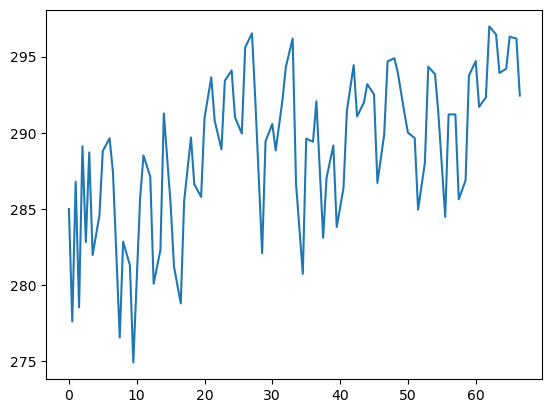

In [7]:
import xarray as xr
import matplotlib.pyplot as pl

all_data=xr.open_dataset('download.nc',decode_times=False)
pl.figure()
pl.plot((all_data['time'].values-all_data['time'].values[0])/24,all_data['t2m'].values[:,1,5,8])


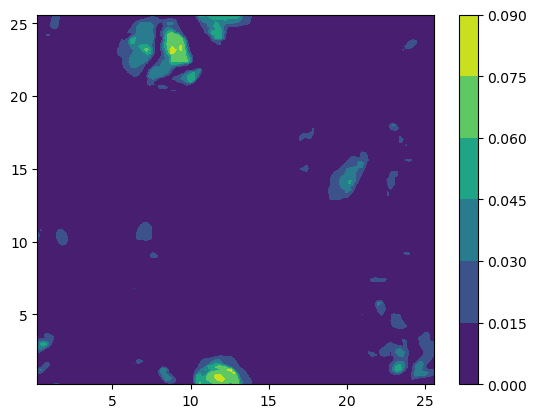

In [10]:
#### Field Plots #####
import os
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import math
from scipy.stats import norm
import seaborn as sns
import xarray as xr
import netCDF4 as nc
import sys

sys.setrecursionlimit(100000)

###########################################################################################################################
def make_netcdffile_fromcross(time_start, time_end, time_gap, x_spacing, variable_name, path, output_name, del_files): 
    float_type = 'f4'
    time_ind_total = int((time_end-time_start)/time_gap) + 1
    time = np.linspace(time_start,time_end,time_ind_total)
    filename = path+variable_name + str(format(int(time[0]),'07d'))
    fid=open(filename,'rb')
    x_length = int(np.sqrt(len(np.fromfile(fid))))
    x=np.linspace(x_spacing,x_length*x_spacing,x_length)
    y=np.linspace(x_spacing,x_length*x_spacing,x_length)
    fid.close()
    if os.path.exists(path+output_name):
        os.remove(path+output_name)
    nc_file = nc.Dataset(path+output_name, mode="w", datamodel="NETCDF4", clobber=False)
    nc_file.createDimension("x", x_length)
    nc_file.createDimension("y", x_length)
    nc_file.createDimension("t", time_ind_total)
    nc_x = nc_file.createVariable("x", float_type, ("x"))
    nc_y = nc_file.createVariable("y", float_type, ("y"))
    nc_t = nc_file.createVariable("t", float_type, ("t"))
    var_name = variable_name.split('.')[0]
    locals()[var_name] = np.zeros((x_length,x_length,time_ind_total))
    locals()['nc_'+var_name] = nc_file.createVariable(var_name, float_type, ("x","y","t"))                    
    for i in range(0,time_ind_total):
        filename = path+variable_name+str(format(int(time[i]),'07d'))
        fid=open(filename,'rb')
        var = np.fromfile(fid)
        locals()[var_name][:,:,i]=np.reshape(var,[x_length,x_length])
        fid.close()
    locals()['nc_'+var_name][:] = locals()[var_name][:]




    nc_x [:] = x[:]
    nc_y [:] = y[:]
    nc_t [:] = time[:]
    nc_file.close()
    if del_files:
        #files = ["u", "v", "w", "thl", "time", "qr", "ql", "couv", "grid", "nr","qt","therm","bc"]
        files = [variable_name]
        for file in os.listdir(path):
            for i in range(0,len(files)):
                if file.find(files[i])!=-1: 
                    os.remove(path+file)
                #rm u* v* w* thl* time* qr* ql* couv* grid* nr* qt* therm* 
##########################################################################################
class cell:
    def __init__(self, id):
        self.id = id
        self.value = [[]]
        self.location = [[],[]]
        self.nelements = 0
        self.nelements_local = 0

    def add_elements(self, i, j, var_values):
        self.location[0].append(i)
        self.location[1].append(j)
        self.value[0].append(var_values)
        self.nelements = self.nelements + 1
        self.nelements_local = self.nelements_local + 1
    def __del__(self):
        return
##########################################################################################
def find_boolean(variable, threshold_criteria): #variable is f(i, j, t): --> outputs boolean -1 (unsatisfied) 0 (satisfied) 
    boolean = np.zeros(( len(variable[:,0]), len(variable[0,:])))
    boolean = -1
    boolean = np.where(variable[:,:]>threshold_criteria,0,-1)
    return boolean;
########################################################################################
def identify_elements_in_cell(i,j,new_cell):  #input the ijk at which boolean is satisfied along with boolean and new cell created 

    global booli;
    new_cell.add_elements(i,j,cell_variable[i,j])
    booli[i,j] = -1

    ii=i-1; jj=j; #look west
    if ii<0:
       ii = nx-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i+1; jj=j;  #look east
    if ii>nx-1:
       ii = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j+1;  #look north
    if jj>ny-1:
        jj = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j-1;  #look south
    if jj<0:
       jj = ny-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell) 
#################################################################################################
def create_new_cell(variable,bool):                                # input the boolean and the variable, output is the cells tracked (i,j,t) based on boolean 
    cell_number = 0;
    global booli,cell_variable,nx,ny;
    nx = len(variable[:,0])
    ny = len(variable[0,:])
    booli=bool;cell_variable = variable;
    variable_cells = []
    for j in range(0,ny):
        for i in range(0,nx):
            if booli[i,j]==0: 
                new_cell=cell(cell_number) 
                identify_elements_in_cell(i,j,new_cell)
                if new_cell.nelements>=nminelems:
                    variable_cells.append(new_cell)
                    variable_cells[cell_number].id = cell_number
                    cell_number = cell_number + 1
                else:
                    del new_cell;
    return variable_cells, cell_number;
#################################################################################################
def run_tracking(tracked_variable,param_threshold):
    global nx,ny;
    nx = len(tracked_variable[:,0]); ny = len(tracked_variable[0,:]); 
    bool = find_boolean(tracked_variable,param_threshold)
    [cells,cell_number] = create_new_cell(tracked_variable,bool);
    return cells,cell_number;
####################################################################################################
def find_cell_centers(cells,ncells):
    centers=np.zeros((ncells,2))
    for i in range(0,ncells):
        centers[i,0]=np.mean(cells[i].location[0])
        centers[i,1]=np.mean(cells[i].location[1])
    return centers;
####################################################################################################
def find_nearest_neighbor(centers,nx,ny):
    distance=np.zeros(len(centers[:,0]))
    nn_distance=np.zeros(len(centers[:,0]))
    for i in range(len(centers[:,0])):
        for j in range(len(centers[:,0])):
            if i==j:
                distance[j]=100;
            else:
                xdist=min(abs(centers[i,0]+nx-centers[j,0]),abs(centers[i,0]-nx-centers[j,0]),abs(centers[i,0]-centers[j,0]))
                ydist=min(abs(centers[i,1]+ny-centers[j,1]),abs(centers[i,1]-ny-centers[j,1]),abs(centers[i,1]-centers[j,1]))
                distance[j]=math.sqrt(xdist**2+ydist**2)
        nn_distance[i]=min(distance)
    return nn_distance;
####################################################################################################
def retrieve_variable(variable_name,netcdf_path): #open corresponding netcdf file and read data
    all_data=xr.open_dataset(netcdf_path)
    var=all_data[variable_name].values
    variable=var
    x=all_data['x'].values
    y=all_data['y'].values
    t=all_data['t'].values
    return variable, x, y, t;    
##########################################################################################
#[w_cross,x,y,t]=retrieve_variable(variable_name='w',netcdf_path='/fs/ess/PFS0220/eurec4a/case_1060lagtraj_feb2_withw/w_cross.nc')
def get_iorg(variable,param_threshold,start_ind,stop_ind):
    i_org=np.zeros(len(variable[0,0,start_ind:stop_ind+1]))
    for i in range(0,stop_ind-start_ind+1):
        [updraft,ncells]=run_tracking(tracked_variable=variable[:,:,start_ind+i],param_threshold=param_threshold)
        if ncells<2:
            i_org[i]=0;
        else:
            centers=find_cell_centers(updraft,ncells)
            nn_distance=find_nearest_neighbor(centers,nx,ny)
            centers=centers.astype(int)
            nn_sorted = np.sort(nn_distance*delx/1000);nn_sorted=nn_sorted/max(nn_sorted)
            p = 1. * np.arange(len(nn_distance)) / (len(nn_distance) - 1)
            p_ran=1-np.exp(-1*(math.pi)*nn_sorted*nn_sorted)
            i_org[i]=np.trapz(p,x=p_ran)
        if i==0 and ncells>2:
            pl.figure()
            pl.contour(x/1000,y/1000,variable[:,:,start_ind+i]>1)
            pl.title('w > 1 ms$^-1$ at z = 800 m')
            pl.xlabel('X (km)')
            pl.ylabel('Y (km)')
            pl.show()
            
            pl.figure()
            center_arr=np.zeros((nx,ny))
            center_arr[(centers[:,0]),(centers[:,1])]=1;
            pl.contour(x/1000,y/1000,center_arr)
            pl.xlabel('x')
            pl.ylabel('y')
            pl.title('Centroids of Updrafts')

            pl.figure()
            distance_arr=np.zeros((nx,ny))
            distance_arr[(centers[:,0]),(centers[:,1])]=nn_distance;
            pl.contour(x/1000,y/1000,center_arr)
            pl.xlabel('x')
            pl.ylabel('y')
            pl.title('Centroids of Updrafts')

            pl.figure()
            pl.plot(nn_sorted,p,nn_sorted,p_ran)
            pl.xlabel('x (NN Distance)')
            pl.ylabel('p=F(x)')

            pl.figure()
            pl.plot(p_ran,p,p_ran,p_ran,'b--')
            pl.xlabel('Random CDF')
            pl.ylabel('NNCDF')            

        print(i)
    return i_org;
#########################################################################################
def get_maxelems(variable,param_threshold,start_ind,stop_ind):
    maxelems=np.zeros(len(variable[0,0,start_ind:stop_ind+1]))
    maxcell_value=np.zeros(len(variable[0,0,start_ind:stop_ind+1]))
    for i in range(0,stop_ind-start_ind+1):
        [updraft,ncells]=run_tracking(tracked_variable=variable[:,:,start_ind+i],param_threshold=param_threshold)
        nelems=np.zeros((ncells))
        for j in range(0,ncells):
            nelems[j]=updraft[j].nelements
        maxelems[i]=max(nelems,default=0)
        if maxelems[i]>0:
            ind=np.nonzero(nelems==max(nelems))[0][0]
            maxcell_value[i]=np.sum(updraft[ind].value[0][:])
        
        if i%10==0:
            print(i)
    return maxelems,maxcell_value;
######################################################################################################################
delx=200
nc_path='/data/eurec4a/SEUS_09142022/'
#make_netcdffile_fromcross(time_start=0,time_end=1764,time_gap=36,x_spacing=delx,variable_name='qlpath.xy.',path=nc_path,output_name='qlpath.nc',del_files=True)
[qlpath,x,y,t]=retrieve_variable(variable_name='qlpath',netcdf_path=nc_path+'qlpath.nc')

hrs=37
ind=np.nonzero(t*100/3600==hrs)[0][0]
levs=np.concatenate((np.linspace(0,0.0001,20),np.linspace(0.00011,1,1)))
pl.figure()
#pl.contourf(x/1000,y/1000,qlpath[:,:,int(ind)],levels=levs,cmap=cm.gray)
pl.contourf(x/1000,y/1000,qlpath[:,:,int(ind)])
pl.colorbar()

#[w_cross,x,y,t]=retrieve_variable(variable_name='w',netcdf_path=nc_path+'w_cross.nc')
#nx=len(x);ny=len(y); start_ind=np.nonzero(t==180)[0][0]; stop_ind=np.nonzero(t==1395)[0][0]
#nminelems=10;
#i_org1=get_iorg(variable=w_cross,param_threshold=1,start_ind=start_ind,stop_ind=stop_ind)
#t1=t[start_ind:stop_ind+1]



In [5]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm

x_dim=128; 
y_dim=128; 
dz = 20;
dl=100;
hr=8;
pwd='/data/eurec4a/SGP_05092017/'
variable='t_soil'
scale='n'
ref_height=800
ref_length_y=50

height_lim=int(6000/dz);
var_time=str(format(int(hr*36),'04d'))
fid = open(pwd+variable+'.000'+var_time,'rb')
var = np.fromfile(fid)
levs_abs=np.concatenate((np.linspace(0,1e-4,10),np.linspace(0.0011,1,1)))
x=np.linspace(0,x_dim*dl,x_dim)
y=np.linspace(0,y_dim*dl,y_dim)
z_new=np.zeros(300)
z_abs=10
dz=20;
for i in range(0,z_new.size): 
    if i>200:
        dz=dz+int(round(0.1*dz,0));
    z_new[i] = z_abs;
    z_abs = z_abs+dz
z_end_ind=np.nonzero((z_new>29000))[0][0]
z=z_new[0:z_end_ind+1]
var=np.reshape(var,[z.size,x_dim,y_dim])
ref_ind=np.absolute(z-ref_height).argmin()
var_plot=var[ref_ind,:,:]
ref_ind_y=np.absolute(y-ref_length_y*1000).argmin()

pl.figure()
if scale =='g':
    pl.contourf(x/1000,y/1000,var_plot)
else:
    pl.contourf(x/1000,y/1000,var_plot)
#pl.contourf(x,y,var_plot>0,cmap=cm.gray)
pl.title(variable+' at z = %d m' %(z[ref_ind]) + ' (%d hrs)'  %(int(var_time)/36))
pl.xlabel('X (km)')
pl.ylabel('Y (km)')
pl.colorbar()
pl.show()

var_plot=var[0:height_lim,ref_ind_y,:]
pl.figure()
pl.contourf(x/1000,z[0:height_lim]/1000,var_plot,levels=levs_abs,cmap=cm.jet)
pl.title(variable+' at y = %d km' %(ref_length_y) + ' (%d hrs)'  %(int(var_time)/36))
    
pl.xlabel('X (km)')
pl.ylabel('Z (km)')
pl.colorbar()
pl.show()

ValueError: cannot reshape array of size 65536 into shape (252,128,128)

<class 'netCDF4._netCDF4.Group'>
group /radiation:
    dimensions(sizes): 
    variables(dimensions): float64 lw_flux_up(time, zh), float64 lw_flux_dn(time, zh), float64 lw_flux_up_clear(time, zh), float64 lw_flux_dn_clear(time, zh), float64 sw_flux_up(time, zh), float64 sw_flux_dn(time, zh), float64 sw_flux_dn_dir(time, zh), float64 sw_flux_up_clear(time, zh), float64 sw_flux_dn_clear(time, zh), float64 sw_flux_dn_dir_clear(time, zh), float64 lw_flux_up_ref(p_rad), float64 lw_flux_dn_ref(p_rad), float64 sza(time), float64 sw_flux_dn_toa(time)
    groups: 


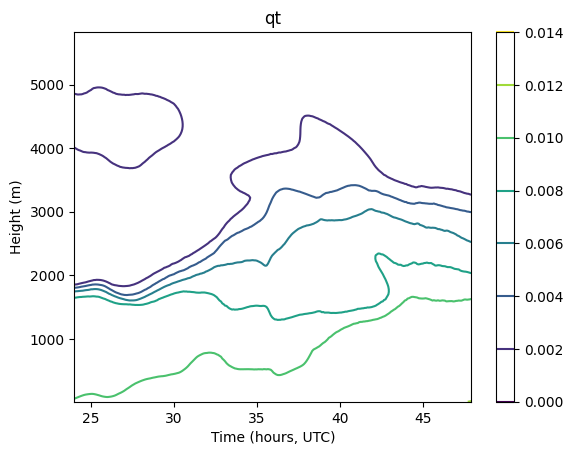

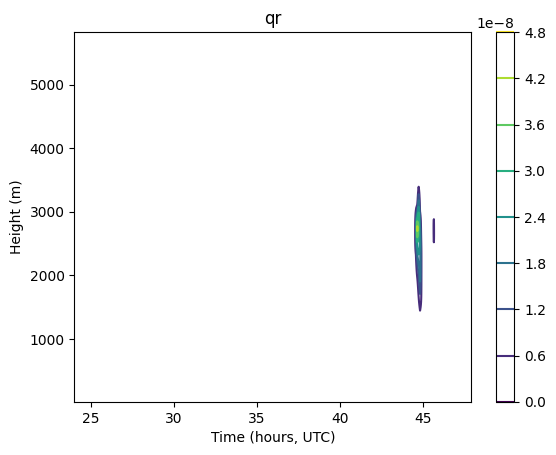

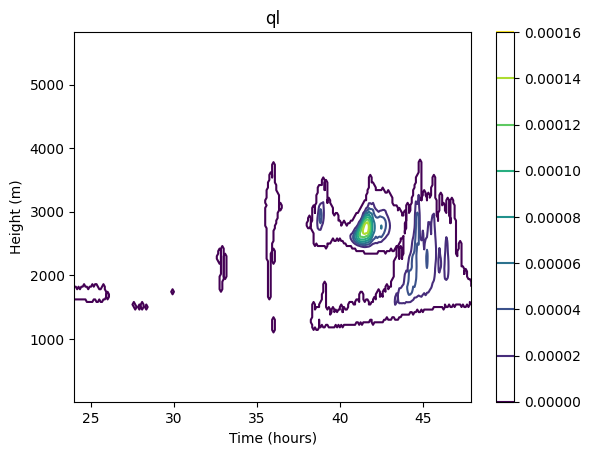

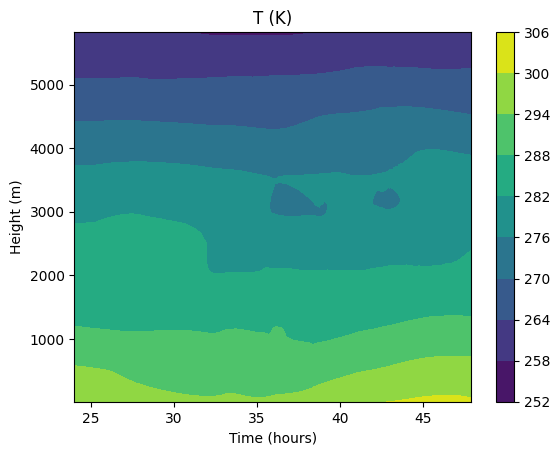

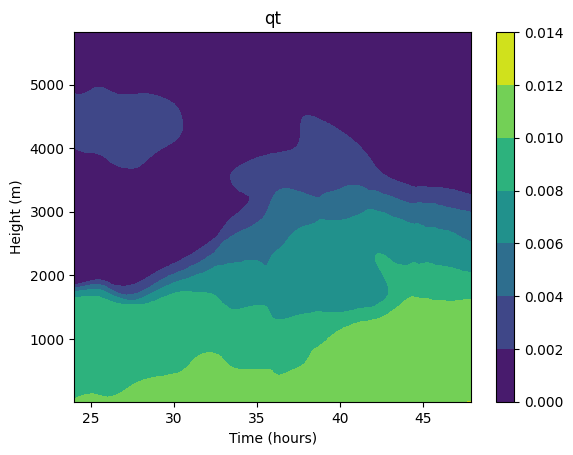

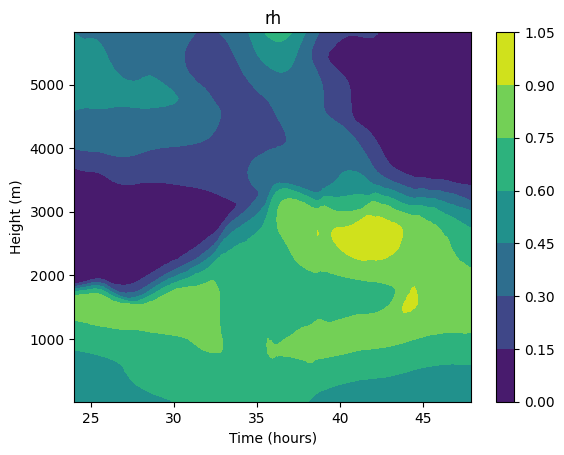

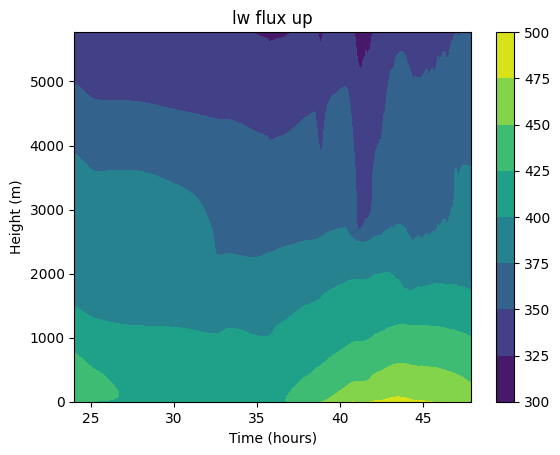

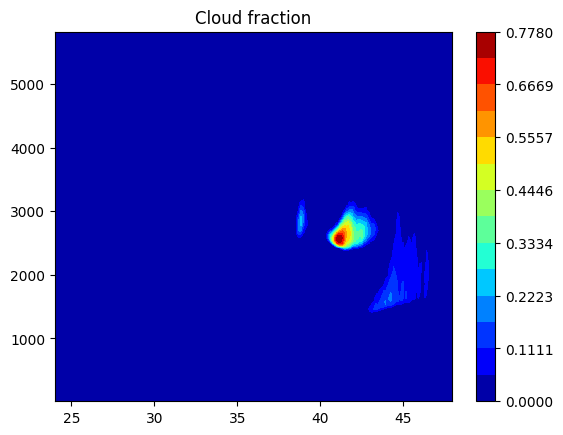

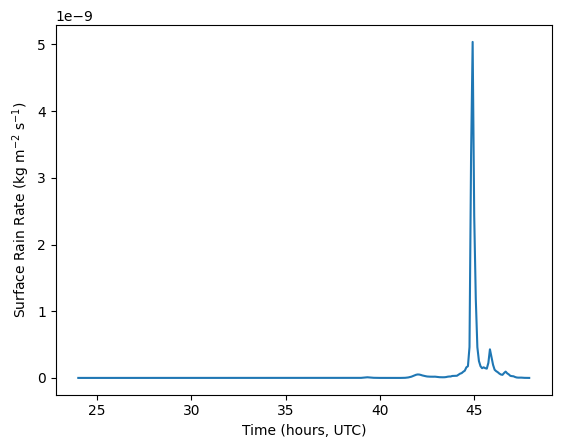

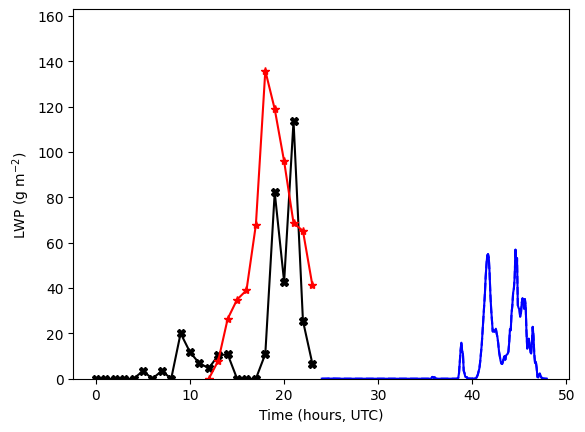

(0.0, 14.0)

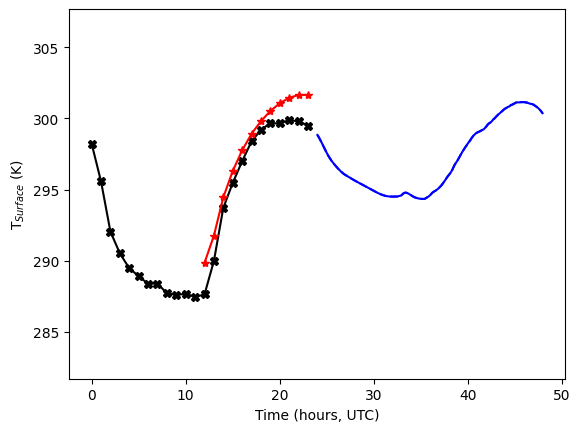

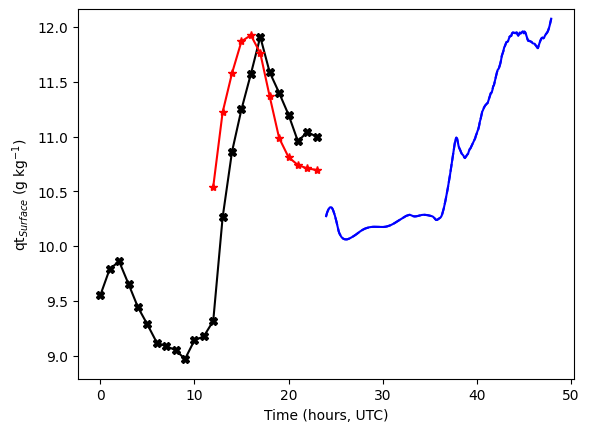

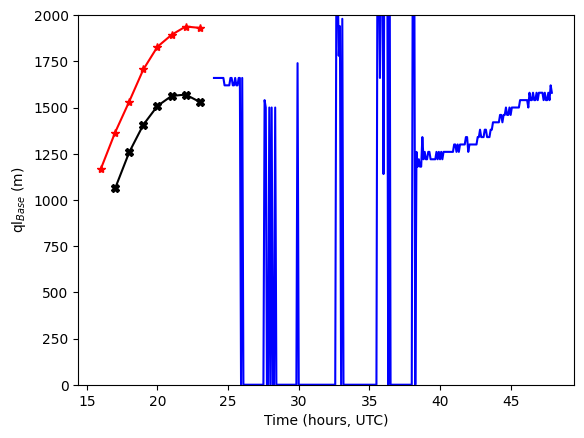

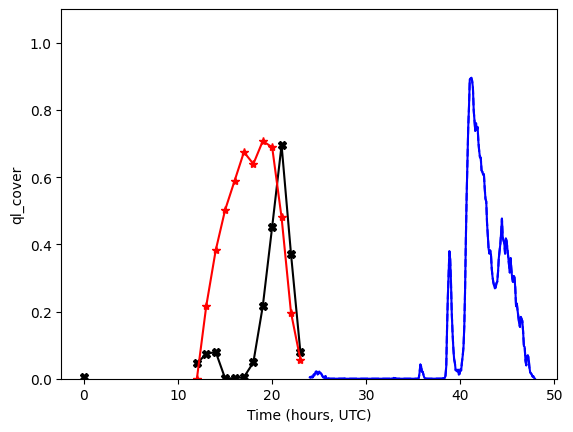

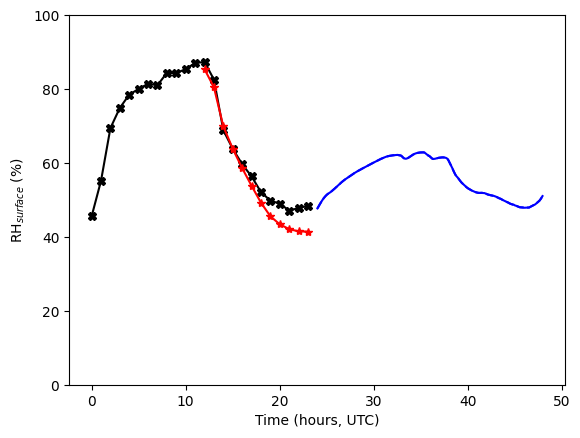

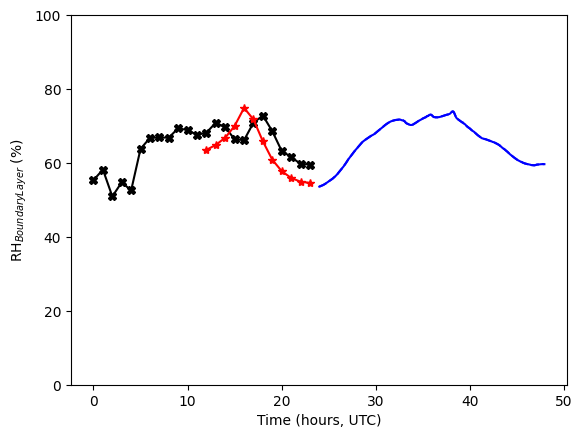

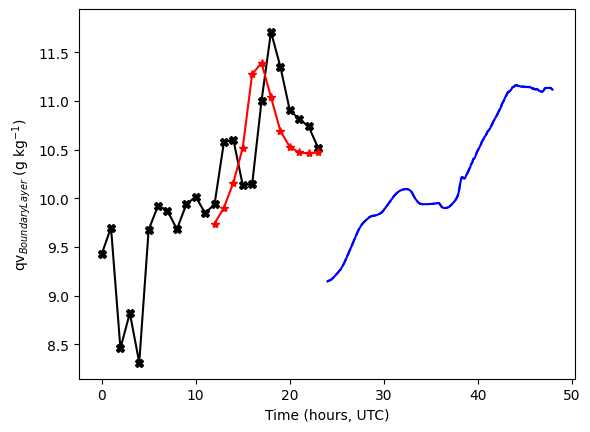

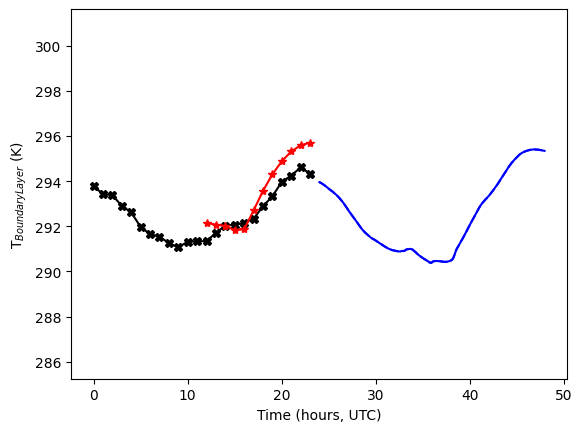

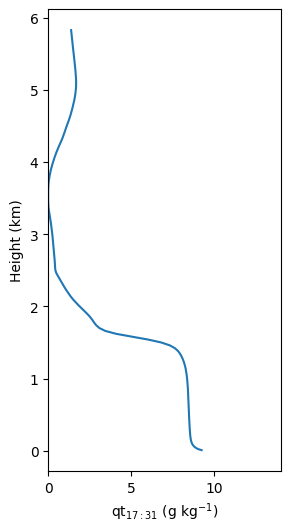

In [3]:
### Plot from 3 files ###
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime
from datetime import timedelta
from matplotlib import cm

date_plot='20170509'
pwd=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_24hrbefore/'
pwd_n=f'/fs/ess/PFS0220/LSM/SGP/SGP_{date_plot}_24hrbefore/'
t_after1=24;
t_after2=24;
dz=40; 
start_time=datetime(2022,9,14,20)

nc_filename='eurec4a.default.000' + '0000' +'.nc';
xrdata=xr.open_dataset(pwd+nc_filename,decode_times=False)
xrdata_def=xr.open_dataset(pwd+nc_filename,group='default',decode_times=False);
xrdata_thermo=xr.open_dataset(pwd+nc_filename,group='thermo',decode_times=False);
xrdata_rad=xr.open_dataset(pwd+nc_filename,group='radiation',decode_times=False);

xrdata_n=xr.open_dataset(pwd_n+nc_filename,decode_times=False)
xrdata_thermo_n=xr.open_dataset(pwd_n+nc_filename,group='thermo',decode_times=False);

z=xrdata['z'].values
zh=xrdata['zh'].values
time=xrdata['time'].values
qr = xrdata_thermo['qr'].values;
ql = xrdata_thermo_n['ql'].values;
qt = xrdata_thermo['qt'].values;
u = xrdata_def['u'].values;
ql_frac = xrdata_thermo['ql_frac'].values;
rr = xrdata_thermo['rr'].values
qlpath=xrdata_thermo['ql_path']
qr_flux=xrdata_thermo['qr_flux'].values;
p=xrdata_thermo['phydro'].values;
qt_bot=xrdata_thermo['qt_bot'].values;
T=xrdata_thermo['T'].values;
w=xrdata_def['w'].values;
ql_base=np.zeros((len(time)))

for i in range(len(time)):
    if len(np.nonzero(ql[i,:])[0])==0:
        ql_base[i]=0;
    else:
        ql_base[i]=z[np.nonzero(ql[i,:])[0][0]]
ds=nc.Dataset(pwd+nc_filename)
print(ds.groups['radiation'])

time=time/3600
ts=0
tp1=int((ts+t_after1)*3600/300)
tp2=int((ts+24+t_after1)*3600/300)
tpn1=int((ts+t_after2)*3600/300)
tpn2=int((ts+24+t_after2)*3600/300)
mean_height=332.75;mean_height=0;

t_rad=np.absolute(time*3600-(17*60+31)*60).argmin()
time=(time)
z_ind=np.absolute(z-6000).argmin()
z_bl_bot=np.absolute(z-500).argmin()
z_bl_top=np.absolute(z-700).argmin()
###################### read obs and lasso model data ###################################
pwd='/fs/ess/PFS0220/LSM/SGP/SGP_obs/obs_model/'
ncfilename=f'sgplassodiagobsmod2C1.m1.{date_plot}.000000.nc'
#ncfilename_2d=f'sgplassodiagobsmod2d2C1.m1.{date_plot}.000000.nc'
all_data_obs=xr.open_dataset(pwd+ncfilename,decode_times=False)
#all_data_2d=xr.open_dataset(pwd+ncfilename_2d,decode_times=False)
time_obs=all_data_obs['time'].values; time_obs=time_obs/3600;
lwp_obs=all_data_obs['lwp'].values;
Ts_obs=all_data_obs['temperature_surface'].values;
qs_obs=all_data_obs['water_vapor_mixing_ratio_surface'].values;
ql_base_obs=all_data_obs['cloud_base_height'].values;
ql_cover_obs=all_data_obs['cloud_fraction_tsi'].values;
rh_surface_obs=all_data_obs['rh_surface'].values;
rh_bl_obs=all_data_obs['rh_boundary_layer'].values;
qt_bl_obs=all_data_obs['water_vapor_mixing_ratio_boundary_layer'].values;
T_bl_obs=all_data_obs['temperature_boundary_layer'].values;
to1=0; to2=24;
to2=np.absolute(time_obs-24).argmin()

############### contour plots ###############################
pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(qt[tp1:tp2,0:z_ind]))
pl.title('qt')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(qr[tp1:tp2,0:z_ind]))
pl.title('qr')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time[tp1:tp2],z[0:z_ind],np.transpose(ql[tp1:tp2,0:z_ind]))
pl.title('ql')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(T[tp1:tp2,0:z_ind]))
pl.title('T (K)')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(qt[tp1:tp2,0:z_ind]))
pl.title('qt')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(xrdata_thermo['rh'].values[tp1:tp2,0:z_ind]))
pl.title('rh')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time[tp1:tp2],zh[0:z_ind],np.transpose(xrdata_rad['lw_flux_up'].values[tp1:tp2,0:z_ind]))
pl.title('lw flux up')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

dt_array=np.array([start_time + timedelta(hours=i) for i in time])
levs=np.linspace(0,np.max(ql_frac[tp1:tp2,0:z_ind]),15)
levs_abs=np.concatenate((np.linspace(0,0.9,15),np.linspace(0.91,1.1,2)))
pl.figure()
pl.contourf(time[tp1:tp2],z[0:z_ind],np.transpose(ql_frac[tp1:tp2,0:z_ind]),levels=levs,cmap=cm.jet)
pl.title('Cloud fraction')
pl.colorbar()

#pl.figure()
#pl.contourf(all_data_2d['time'].values/3600,all_data_2d[] z[0:z_ind],np.transpose(ql_frac[tp1:tp2,0:z_ind]),levels=levs,cmap=cm.jet)
#pl.title('Cloud fraction')
#pl.colorbar()

############## line plots ########################################
pl.figure()
pl.plot(time[tp1:tp2],rr[tp1:tp2])
pl.xlabel('Time (hours, UTC)')
pl.ylabel('Surface Rain Rate (kg m$^{-2}$ s$^{-1}$)')

pl.figure()
pl.plot(time[tp1:tp2]-ts,qlpath[tp1:tp2]*1000,'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,xrdata_thermo_n['ql_path'].values[tpn1:tpn2]*1000,'b--')
pl.plot(time_obs[to1:to2],lwp_obs[to1:to2,0],'k-',time_obs[to1:to2],lwp_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],lwp_obs[to1:to2,1],'r-',time_obs[to1:to2],lwp_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('LWP (g m$^{-2}$)')
pl.ylim([0,1.2*np.nanmax(lwp_obs[to1:to2,:])])
pl.show()

pl.figure()
pl.plot(time[tp1:tp2]-ts,T[tp1:tp2,0],'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,xrdata_thermo_n['T'].values[tpn1:tpn2,0],'b--')
pl.plot(time_obs[to1:to2],Ts_obs[to1:to2,0],'k-',time_obs[to1:to2],Ts_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],Ts_obs[to1:to2,1],'r-',time_obs[to1:to2],Ts_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('T$_{Surface}$ (K)')
pl.ylim([0.98*np.nanmin(Ts_obs[to1:to2,:]),1.02*np.nanmax(Ts_obs[to1:to2,:])])

pl.figure()
pl.plot(time[tp1:tp2]-ts,qt[tp1:tp2,0]*1000,'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,xrdata_thermo_n['qt'].values[tpn1:tpn2,0]*1000,'b--')
pl.plot(time_obs[to1:to2],qs_obs[to1:to2,0],'k-',time_obs[to1:to2],qs_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],qs_obs[to1:to2,1],'r-',time_obs[to1:to2],qs_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('qt$_{Surface}$ (g kg$^{-1}$)')
pl.ylim([0.98*np.nanmin(qs_obs[to1:to2,:]),1.02*np.nanmax(qs_obs[to1:to2,:])])

pl.figure()
pl.plot(time[tp1:tp2]-ts,ql_base[tp1:tp2]+mean_height,'b-')
pl.plot(time_obs[to1:to2],ql_base_obs[to1:to2,0],'k-',time_obs[to1:to2],ql_base_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],ql_base_obs[to1:to2,1],'r-',time_obs[to1:to2],ql_base_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('ql$_{Base}$ (m)')
#pl.ylim([0.8*np.min(ql_base_obs[to1:to2,:]),1.2*np.max(ql_base_obs[to1:to2,:])])
pl.ylim([0,2000])
#pl.figure()
#pl.plot(xrdata['time'].values,xrdata_rad['sw_flux_dn_toa'].values)
 
pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,xrdata_thermo['ql_cover'].values[tp1:tp2],'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,xrdata_thermo_n['ql_cover'].values[tpn1:tpn2],'b--')
pl.plot(time_obs[to1:to2],ql_cover_obs[to1:to2,0],'k-',time_obs[to1:to2],ql_cover_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],ql_cover_obs[to1:to2,1],'r-',time_obs[to1:to2],ql_cover_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('ql_cover')
pl.ylim([0,1.1])

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,xrdata_thermo['rh'].values[tp1:tp2,0]*100,'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,xrdata_thermo_n['rh'].values[tpn1:tpn2,0]*100,'b--')
pl.plot(time_obs[to1:to2],rh_surface_obs[to1:to2,0],'k-',time_obs[to1:to2],rh_surface_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],rh_surface_obs[to1:to2,1],'r-',time_obs[to1:to2],rh_surface_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('RH$_{surface}$ (%)')
pl.ylim([0,100])

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo['rh'].values[tp1:tp2,z_bl_bot:z_bl_top]*100,axis=1),'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo_n['rh'].values[tpn1:tpn2,z_bl_bot:z_bl_top]*100,axis=1),'b--')
pl.plot(time_obs[to1:to2],rh_bl_obs[to1:to2,0],'k-',time_obs[to1:to2],rh_bl_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],rh_bl_obs[to1:to2,1],'r-',time_obs[to1:to2],rh_bl_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('RH$_{BoundaryLayer}$ (%)')
pl.ylim([0,100])

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo['qt'].values[tp1:tp2,z_bl_bot:z_bl_top]*1000,axis=1),'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo_n['qt'].values[tpn1:tpn2,z_bl_bot:z_bl_top]*1000,axis=1),'b--')
pl.plot(time_obs[to1:to2],qt_bl_obs[to1:to2,0],'k-',time_obs[to1:to2],qt_bl_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],qt_bl_obs[to1:to2,1],'r-',time_obs[to1:to2],qt_bl_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('qv$_{BoundaryLayer}$ (g kg$^{-1}$)')
pl.ylim([0.98*np.nanmin(qt_bl_obs[to1:to2,:]),1.02*np.nanmax(qt_bl_obs[to1:to2,:])])

pl.figure()
pl.plot(xrdata['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo['T'].values[tp1:tp2,z_bl_bot:z_bl_top],axis=1),'b-')
pl.plot(xrdata_n['time'].values[tp1:tp2]/3600-ts,np.mean(xrdata_thermo_n['T'].values[tpn1:tpn2,z_bl_bot:z_bl_top],axis=1),'b--')
pl.plot(time_obs[to1:to2],T_bl_obs[to1:to2,0],'k-',time_obs[to1:to2],T_bl_obs[to1:to2,0],'kX')
pl.plot(time_obs[to1:to2],T_bl_obs[to1:to2,1],'r-',time_obs[to1:to2],T_bl_obs[to1:to2,1],'r*')
pl.xlabel('Time (hours, UTC)')
pl.ylabel('T$_{BoundaryLayer}$ (K)')
pl.ylim([0.98*np.nanmin(T_bl_obs[to1:to2,:]),1.02*np.nanmax(T_bl_obs[to1:to2,:])])

########### Radiosonde #################################
fig = pl.figure(figsize=(3,6))
pl.plot(qt[t_rad,0:z_ind]*1000,(z[0:z_ind]+mean_height)/1000)
pl.ylabel('Height (km)')
pl.xlabel('qt$_{17:31}$ (g kg$^{-1}$)')
pl.xlim([0,14])










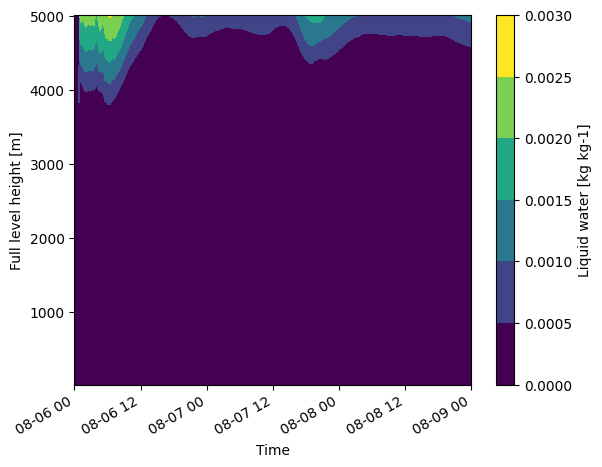

In [7]:
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime
from datetime import timedelta
from matplotlib import cm
from netCDF4 import Dataset

nc_path='/fs/ess/PFS0220/LSM/SGP/SGP_lagtraj/SGP.default.0000000.nc'
xrdata=xr.open_dataset(nc_path,decode_times=False)

microhh_out=xr.open_dataset(nc_path,decode_times=True) 
rootgroup = Dataset(nc_path,"r") 
for group in rootgroup.groups: 
    microhh_out=xr.merge([microhh_out, xr.open_dataset(nc_path,group=group,decode_times=True)]) 


pl.figure()
microhh_out['ql'].transpose().plot.contourf()